# 01_import dataset

## 01-1_import data

In [1]:
import os
import json
import pandas as pd

#https://drive.google.com/drive/folders/18qV82fNY3IIWu3BRoGqm_LNgJzE8Akbr?usp=drive_link
#base_dir = "/Users/Andypon/10_‰∫§Â§ßÁ†îÁ©∂ÊâÄ/1141_01_Ê©üÂô®Â≠∏ÁøíËàáÈáëËûçÁßëÊäÄ/data"
base_dir= '/Users/andyw.p.chen/Documents/Project/datasets'
#base_dir=  "c:\Users\user\Downloads\datasets"

def load_json_to_df(filename: str) -> pd.DataFrame:
    file_path = os.path.join(base_dir, filename)
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    # Â¶ÇÊûúÊòØ { "target": {id: value, ...} }
    if isinstance(data, dict) and len(data) == 1 and isinstance(next(iter(data.values())), dict):
        key, inner = next(iter(data.items()))
        return pd.DataFrame(list(inner.items()), columns=["id", key])

    # dict of scalar
    if isinstance(data, dict):
        return pd.DataFrame([{"code": k, "desc": v} for k, v in data.items()])

    # list of dict
    elif isinstance(data, list):
        return pd.DataFrame(data)

    else:
        raise ValueError(f"Unsupported JSON structure in {filename}: {type(data)}")


def load_csv_to_df(filename: str) -> pd.DataFrame:
    """ËÆÄÂèñ CSV ‰∏¶ËΩâÁÇ∫ DataFrame„ÄÇ"""
    return pd.read_csv(os.path.join(base_dir, filename))

# JSON Ë≥áÊñô
##mcc_codes_df = load_json_to_df("mcc_codes.json")
train_fraud_labels_df = load_json_to_df("train_fraud_labels.json")

# CSV Ë≥áÊñô
cards_df = load_csv_to_df("cards_data.csv")
transactions_df = load_csv_to_df("transactions_data.csv")
users_df = load_csv_to_df("users_data.csv")

# Á∞°ÂñÆÊ™¢Êü•
#print(mcc_codes_df.head())
#print(train_fraud_labels_df.head())
#print(cards_df.head())
#print(transactions_df.head())
#print(users_df.apthead())


## 01-2_rename variable in each data set

In [2]:
train_fraud_labels_df = train_fraud_labels_df.rename(columns={'id': 'transactions_id'})
train_fraud_labels_df = train_fraud_labels_df.rename(columns={'target': 'is_fraud'})

cards_df = cards_df.rename(columns={'id':'card_id'})

users_df = users_df.rename(columns={'id':'client_id'})

transactions_df = transactions_df.rename(columns={'mcc': 'mcc_code'})
transactions_df = transactions_df.rename(columns={'id': 'transaction_id'})




## 01-3_ËÆäÊï∏ÂûãÊÖãÁµ±‰∏ÄÂèäÁº∫Â§±ÂÄºËôïÁêÜ

In [3]:
def add_missing_flags(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """
    Âú® DataFrame ‰∏≠Â∞çÊåáÂÆöÊ¨Ñ‰ΩçÂª∫Á´ã missing flag Ê¨Ñ‰Ωç
    flag=1 Ë°®Á§∫Áº∫Â§±ÂÄºÔºåflag=0 Ë°®Á§∫ÈùûÁº∫Â§±ÂÄº
    
    ÂèÉÊï∏
    ----
    df : pd.DataFrame
        Ëº∏ÂÖ•ÁöÑË≥áÊñôÊ°Ü
    cols : list
        Ë¶ÅÊ™¢Êü•ÁöÑÊ¨Ñ‰ΩçÂêçÁ®±Ê∏ÖÂñÆ
    
    ÂõûÂÇ≥
    ----
    pd.DataFrame : Êñ∞ÁöÑË≥áÊñôÊ°Ü (Âê´Êñ∞Â¢ûÁöÑ flag Ê¨Ñ‰Ωç)
    """
    for col in cols:
        df[f"{col}_missing_flag"] = df[col].isna().astype(int)
    return df

transactions_df = add_missing_flags(transactions_df, ["merchant_state", "zip", "errors"])

In [4]:
##train_fraud_labels_df##
train_fraud_labels_df["is_fraud"]=train_fraud_labels_df["is_fraud"].astype("category") 
train_fraud_labels_df["transactions_id"]=train_fraud_labels_df["transactions_id"].astype(int) #Âêà‰ΩµË≥áÊñôÈúÄË¶Å

##cards_df##
cards_df["card_brand"]=cards_df["card_brand"].astype("category") 
cards_df["card_type"]=cards_df["card_type"].astype("category")
#####‰∏çË¶ÅloadÈÄôË°å cards_df["expires"]=pd.to_datetime(cards_df["expires"], format="%m/%Y")
cards_df["expires"] = pd.to_datetime(cards_df["expires"], format="%m/%Y").dt.to_period("M")
cards_df["has_chip"]=cards_df["has_chip"].astype("category")

cards_df['credit_limit'] = cards_df['credit_limit'].replace(r'[\$,]', '', regex=True).astype(int)
#####‰∏çË¶ÅloadÈÄôË°å cards_df["acct_open_date"]=pd.to_datetime(cards_df["acct_open_date"], format="%m/%Y")
cards_df["acct_open_date"] = pd.to_datetime(cards_df["acct_open_date"], format="%m/%Y").dt.to_period("M")
#####‰∏çË¶ÅloadÈÄôË°å cards_df["year_pin_last_changed"]=pd.to_datetime(cards_df["year_pin_last_changed"], format="%Y")
cards_df["year_pin_last_changed"] = pd.to_datetime(cards_df["year_pin_last_changed"], format="%Y").dt.to_period("Y")
cards_df["card_on_dark_web"]=cards_df["card_on_dark_web"].astype("category") 

##users_df##
users_df["birth_year"] = pd.to_datetime(users_df["birth_year"], format="%Y").dt.to_period("Y")
users_df["birth_month"] = pd.to_datetime(users_df["birth_month"], format="%m").dt.to_period("M")
users_df["gender"]=users_df["gender"].astype("category") 
users_df['per_capita_income'] = users_df['per_capita_income'].replace(r'[\$,]', '', regex=True).astype(int)
users_df['yearly_income'] = users_df['yearly_income'].replace(r'[\$,]', '', regex=True).astype(int)
users_df['total_debt'] = users_df['total_debt'].replace(r'[\$,]', '', regex=True).astype(int)

##transactions_df##
transactions_df["date"] = pd.to_datetime(transactions_df["date"])
#ÊµÆÈªûÊï∏ËΩâÊï¥Êï∏ÂéüÂõ†Á¢∫ÂÆöÔºü
transactions_df['amount'] = transactions_df['amount'].replace(r'[\$,]', '', regex=True).astype(float).astype(int)
##Ë≤†Êï∏ÂèñlogË™øÊàê1
#transactions_df['amount'] = transactions_df['amount'].replace(r'[\$,]', '', regex=True).astype(float)

transactions_df["use_chip"]=transactions_df["use_chip"].astype("category") 

transactions_df.loc[
    transactions_df['merchant_city'].str.lower() == 'online',
    'merchant_state'
] = 'online'

transactions_df.loc[
    transactions_df['merchant_city'].str.lower() == 'online',
    'zip'
] = 20000 #ÂéüÊú¨ÊòØ-1
## ÊàëÊ≤íÊúâÂÖ®ÈÉ®ÊîπÔºåÈÄôÊ®£ÂÆå‰πãÂæå‰ªçÊúâ89006Á≠ÜMissingÔºåÂâ©‰∏ãÈÉΩÊòØÂú®ÂúãÂ§ñ
transactions_df['zip'] = transactions_df['zip'].fillna(10000) #ÂéüÊú¨ÊòØ-999
transactions_df["zip"]=transactions_df["zip"].astype("int64")

transactions_df['errors'] = transactions_df['errors'].astype('category')
transactions_df['errors'] = transactions_df['errors'].cat.add_categories('No_error').fillna('No_error')



In [5]:
#cars one hot encoding
##Áµ±‰∏ÄÈ°ûÂà•ËÆäÊï∏ËΩâdummy variable(Ë¶ÅÊ≥®ÊÑèÂÖ±Á∑öÊÄßÂïèÈ°åÔºåÊáâÂà™ÊéâÂÖ∂‰∏≠‰πã‰∏Ä)

#card_type ÂéüÂßãÁ®ÆÈ°ûÔºöDebit_57%, Credit_33%, Debit(Prepaid)_9%
#card_brand ÂéüÂßãÁ®ÆÈ°ûÔºöMasterCard_52%, Visa_38%, Amex_7%, Discovery_3%
#has_chip ÂéüÂßãÁ®ÆÈ°ûÔºöYes_89%, No_11%
#card_on_dark_web ÂéüÂßãÁ®ÆÈ°ûÔºöNo_0%
cols_to_encode = ['card_type', 'card_brand', 'has_chip']
cards_df[cols_to_encode] = cards_df[cols_to_encode].astype('category')
dummies_cards = pd.get_dummies(
    cards_df[cols_to_encode], 
    prefix=cols_to_encode, 
    dtype='uint8'
    )
cards_df = pd.concat([cards_df, dummies_cards], axis=1)

#use_chip ÂéüÂßãÁ®ÆÈ°ûÔºöSwiped_52%, Chipe_36%, Online_12%
dummies_use = pd.get_dummies(transactions_df['use_chip'], prefix='use_chip', dtype='uint8')
transactions_df = pd.concat([transactions_df, dummies_use], axis=1)

#gender ÂéüÂßãÁ®ÆÈ°ûÔºöFemale_51%, Male_49%
dummies_gender = pd.get_dummies(users_df['gender'], prefix='gender', dtype='uint8')
users_df = pd.concat([users_df, dummies_gender], axis=1)


cards_df.drop(columns=["has_chip_NO","has_chip"], inplace=True)
transactions_df.drop(columns=["use_chip"], inplace=True)
users_df.drop(columns=["gender_Female"], inplace=True)

## 01-4_Ê∏¨Ë©¶Áî®code

In [6]:
##‰∏çÁî®Âü∑Ë°åÔΩûÔΩû(Êú¨‰æÜË©¶ÂúñÂª∫Á´ãÂ∞çÁÖßË°®Â∞áMissingÁöÑzipË£ú‰∏ä)

##Ê™¢Êü•89006Á≠ÜMissingÁöÑzip
c_missing_zip = transactions_df[transactions_df["zip"].isna()]
c_mexico_zip = transactions_df[transactions_df["merchant_state"]=="Mexico"]
#c_mcc_mv_zip = c_missing_zip[
#    (c_missing_zip["mcc_code"] > 5400) & (c_missing_zip["mcc_code"] < 5700)
#]



# ÂÖàÂª∫Á´ã mapping tableÔºö‰∏ÄÁµÑ state+city ÂèØËÉΩÂ∞çÊáâÂ§öÂÄã zip
mapping_df = (
    transactions_df
    .dropna(subset=["zip"])                                   # Âè™Ë¶Å zip ÊúâÂÄºÁöÑ row
    .drop_duplicates(subset=["merchant_state", "merchant_city", "zip"]) 
    [["merchant_state", "merchant_city", "zip"]]              # Âè™Áïô‰∏ãÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
)

print(mapping_df.head())


# ÂÅáË®≠ df Â∑≤Á∂ìÂ≠òÂú®
# Âª∫Á´ãÊñ∞ÁöÑÊ¨Ñ‰Ωç FÔºåB Ëàá C Âêà‰Ωµ
c_missing_zip["fullname"] = c_missing_zip["merchant_city"].astype(str) + c_missing_zip["merchant_state"].astype(str)
# Âª∫Á´ãÊñ∞ÁöÑ DataFrameÔºåÂè™Âèñ A, D, F
df_small = c_missing_zip[["transaction_id", "fullname","zip"]]

mapping_df["mfullname"] = mapping_df["merchant_city"].astype(str) + mapping_df["merchant_state"].astype(str)

# ÂÖàÂª∫Á´ã‰∏ÄÂÄã lookup Â≠óÂÖ∏
lookup_dict = dict(zip(mapping_df["mfullname"], mapping_df["zip"]))

# Áî® map Áï∂‰Ωú vlookup
df_small["zip"] = df_small["zip"].fillna(df_small["fullname"].map(lookup_dict))




  merchant_state merchant_city    zip
0             ND        Beulah  58523
1             IA    Bettendorf  52722
2             CA         Vista  92084
3             IN   Crown Point  46307
4             MD       Harwood  20776


# 02_Ë≥áÊñôÊï¥‰ΩµÊàê‰∏ÄÂºµdataframe

## 02-1_Ë≥áÊñôÊï¥‰Ωµ

In [7]:
#transactions_df.loc[transactions_df["transaction_id"] == 10649266] #transaction_id vs id

#ÂéüÂßãË≥áÊñôÁ≠ÜÊï∏Ôºö13305915
### transactions_df+train_fraud_labels_df      left ÊúÉÊúâ4390952 missing values
merged = pd.merge(transactions_df, train_fraud_labels_df, left_on="transaction_id", right_on="transactions_id", how="outer")
### transactions_df train_fraud_labels_df(8914963) + users_df Â∞çÈÅéÂéª‰∏çÊúÉÊúâmissing values
merged = pd.merge(merged,users_df , left_on="client_id", right_on="client_id", how="left")
### transactions_df train_fraud_labels_df users_df + cards_df Â∞çÈÅéÂéª‰∏çÊúÉÊúâmissing values
merged = pd.merge(merged,cards_df , left_on="card_id", right_on="card_id", how="left")

#Âà™ÊéâÈáçË§áÁöÑcolumns
merged.drop(columns=["transactions_id"], inplace=True)
merged.drop(columns=["client_id_y"], inplace=True)

## Âêà‰ΩµÂÆå‰πãÂæåÊúÄÂæåËôïÁêÜis_fraud(ÂéüÊúÉÊúâmissing valuesÂïèÈ°å)
merged["is_fraud"] = merged["is_fraud"].astype(str)
merged.loc[merged['is_fraud'].str.lower() == 'no','is_fraud'] = '0'
merged.loc[merged['is_fraud'].str.lower() == 'yes','is_fraud'] = '1'
merged["is_fraud"] = pd.to_numeric(merged["is_fraud"], errors="coerce").astype("Int64")

merged = add_missing_flags(merged, ["is_fraud"])

#merged.to_csv("merged.csv", index=False)

# ÂÖàÂà™Èô§‰∏çÈúÄË¶ÅÁöÑDataFrame‰ª•ÁØÄÁúÅË®òÊÜ∂È´î
del transactions_df, users_df, cards_df, train_fraud_labels_df, cols_to_encode, dummies_cards, dummies_use, dummies_gender

In [8]:
del mapping_df, c_missing_zip, c_mexico_zip, df_small, lookup_dict
backup_merged = merged.copy()
#merged = backup_merged.copy()

# 03_EDA_Exploratory-Data-Analysis

## 03-1_Ë≥áÊñôÂûãÊÖã

mergedË≥áÊñôÔºö8914963x37

In [ ]:
merged.info()

## 03-2_Ë≥áÊñôÁµ±Ë®àÊåáÊ®ô

In [ ]:
merged.describe()

In [ ]:
merged.describe(include='all')

## 03-3_È°ûÂà•ÂûãË≥áÊñôfrequency barchart

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = merged.select_dtypes(include=["category"]).columns

n_rows, n_cols = 4, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 50))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(data=merged, x=col, order=merged[col].value_counts().index, ax=ax)
    ax.set_title(f"Bar chart of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    if col == "errors":
        ax.tick_params(axis='x', rotation=90)  # XËª∏Ê®ôÁ±§ÊóãËΩâ
    else:
        ax.tick_params(axis='x', rotation=0)  # XËª∏Ê®ôÁ±§ÊóãËΩâ
    
    # Âú®Èï∑Ê¢ùÂúñ‰∏äÂä†Êï∏Â≠ó
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width()/2,
                y=height + 0.05,
                s=int(height),
                ha='center')

# ÁßªÈô§Â§öÈ§òÁ©∫ÁôΩÂ≠êÂúñ
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 03-4_Êï∏ÂÄºÂûãË≥áÊñôhistogram

In [ ]:
# Ë®≠ÂÆö subplot Ê†ºÂºè
n_cols = 4   # ÊØèÂàóÊîæ4ÂºµÂúñ
n_rows = 6   # ÊØèË°åÊîæ6Âàó (ÂÖ± 4x6=24)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,15))  # Ë™øÊï¥Â§ßÂ∞è
axes = axes.flatten()  # Êî§Âπ≥Êàê‰∏ÄÁ∂≠Êñπ‰æøËø≠‰ª£
num_cols = merged.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(num_cols):
    sns.histplot(data=merged, x=col, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# ÊääÂ§öÈ§òÁöÑ subplot ÈóúÊéâÔºàÈÅøÂÖçÁ©∫ÁôΩÊ°ÜÔºâ
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 03-5_È°ûÂà•ÂûãË≥áÊñôbox plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÊäìÂá∫Êï∏ÂÄºÂûãÊ¨Ñ‰Ωç
num_cols = merged.select_dtypes(include=['int64', 'float64']).columns

# Âª∫Á´ã 3x8 subplot
fig, axes = plt.subplots(8, 3, figsize=(30, 50))  # ‰æùÁÖßÈúÄÊ±ÇË™øÊï¥ figsize
axes = axes.flatten()  # Êî§Âπ≥Êàê‰∏ÄÁ∂≠ arrayÔºåÊñπ‰æøËø¥Âúà

# ÈÄê‰∏ÄÁï´Âúñ
for i, col in enumerate(num_cols):
    sns.boxplot(y=merged[col], ax=axes[i])  # ÊØèÂÄã subplot Áï´‰∏ÄÂÄã boxplot
    axes[i].set_title(col, fontsize=10)

# Â¶ÇÊûúÊ¨Ñ‰ΩçÊï∏Â∞èÊñº 3x8ÔºåÈö±ËóèÂ§öÈ§òÁöÑÂ≠êÂúñ
for j in range(len(num_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


## 03-6_Êï∏ÂÄºÂûãË≥áÊñôpair wise scatterplot(Áï´‰∏çÂá∫‰æÜÔºü)

In [ ]:
num_cols = merged.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(merged[num_cols])

## 03-7_ÈáùÂ∞çË©êÈ®ôÊ®ôÁ±§ËΩâÊàêdummy variable

In [ ]:
cols_to_encode = ['is_fraud']
merged[cols_to_encode] = merged[cols_to_encode].astype('category')
dummies_cards = pd.get_dummies(
    merged[cols_to_encode], 
    prefix=cols_to_encode, 
    dtype='uint8'
    )
merged = pd.concat([merged, dummies_cards], axis=1)
merged.drop(columns=["is_fraud_No","is_fraud"], inplace=True)


In [ ]:
merged["is_fraud_Yes"]=merged["is_fraud_Yes"].astype("int64")
target = 'is_fraud_Yes'  # ÂÅáË®≠ÈÄôÊòØÁõÆÊ®ô
num_cols = merged.select_dtypes(include=['int64','float64']).columns.drop(target)

for col in num_cols:
    plt.figure(figsize=(5,4))
    plt.scatter(merged[col], merged[target], alpha=0.3)  # alphaÈôç‰ΩéÈÄèÊòéÂ∫¶ÔºåÈÅøÂÖçÂ§™Êì†
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{target} vs {col}")
    plt.show()

## 03-8_ÂÖ∂‰ªñËßÄÂØü Ë©êÈ®ôËàáÂê¶Ë∑üÊôÇÈñìÁöÑÈóú‰øÇ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Á¢∫‰øù date ÊòØ datetime Ê†ºÂºè
merged["date"] = pd.to_datetime(merged["date"])

# ÊåâÂ§©Áµ±Ë®àË©êÈ®ô‰∫ã‰ª∂Êï∏
fraud_per_day = merged.groupby(merged["date"].dt.date)["is_fraud_Yes"].sum()

# Áï´ÊäòÁ∑öÂúñ
plt.figure(figsize=(12,5))
fraud_per_day.plot(kind="line", marker="o")
plt.title("Daily Fraud Counts Êó•Êúü vs Ë©êÈ®ôÊ¨°Êï∏")
plt.xlabel("Date")
plt.ylabel("Number of Frauds")
plt.show()


# ÊåâÂ∞èÊôÇ
merged["hour"] = merged["date"].dt.hour
hourly_fraud = merged.groupby("hour")["is_fraud_Yes"].sum()

plt.figure(figsize=(12,5))
hourly_fraud.plot(kind="bar")
plt.title("Fraud Counts by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Frauds")
plt.show()

# ÊåâÊòüÊúüÂπæ
merged["weekday"] = merged["date"].dt.day_name()
weekday_fraud = merged.groupby("weekday")["is_fraud_Yes"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(12,5))
weekday_fraud.plot(kind="bar")
plt.title("Fraud Counts by Weekday")
plt.ylabel("Number of Frauds")
plt.show()



In [ ]:
## ÊÉ≥Á¢∫Ë™çÂéüÂßã‰∫§ÊòìÂàÜÂ∏ÉËàáË©êÈ®ôÁÑ°Èóú
# ÂèñÂá∫Â∞èÊôÇ
merged["hour"] = merged["date"].dt.hour

# ÊåâÂ∞èÊôÇË®àÁÆó‰∫§ÊòìÊï∏
transactions_per_hour = merged["hour"].value_counts().sort_index()

# Áï´Èï∑Ê¢ùÂúñ
plt.figure(figsize=(12,5))
transactions_per_hour.plot(kind="bar")
plt.title("Transaction Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

## 03-9_correlation and heatmap

In [ ]:
numeric_df = merged.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
print(corr)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# --- ÂéüÂßãË≥áÊñô correlation ---
corr_raw = numeric_df.corr()

# --- Ê®ôÊ∫ñÂåñÂæå correlation ---
scaler = StandardScaler()
num_scaled = scaler.fit_transform(numeric_df)   # ËΩâÊèõÊàê Numpy array
num_df_scaled = pd.DataFrame(num_scaled, columns=numeric_df.columns)
corr_scaled = num_df_scaled.corr()

# --- Áπ™Âúñ (‰∏ä‰∏ãÂ∞çÁÖß) ---
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

sns.heatmap(corr_raw, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Correlation Heatmap (Raw Data)")

sns.heatmap(corr_scaled, annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Correlation Heatmap (Standardized Data)")

plt.tight_layout()
plt.show()

## 03-99_categoracal ËΩâ dummyÂàÜÊûê_(‰∏çÁî®Âü∑Ë°å)

In [ ]:
info_df = pd.DataFrame({
    "column": merged.columns,
    "dtype": merged.dtypes.astype(str)
})
info_df.to_csv("info.csv", index=False)

# 04_Benchmark model

## 04-1_Ë≥áÊñôÈÄ≤Ë°åËÆäÊï∏ËΩâÊèõ‰ª•Ê±ÇÊ®°ÂûãÈÖçÈ£æÊõ¥‰Ω≥Ë°®Áèæ

In [ ]:
##ÊúâÂá∫‰∫ãÂÜçË∂ïÂø´ÂõûÂæ©ÂéüÁãÄ
#merged = backup_merged.copy()

In [9]:
#merged[["card_id","card_number"]]
import numpy as np
from scipy import stats 

# === (1) logËΩâÊèõ ===
merged['amount'] = np.where(merged['amount'] < 0, 0, merged['amount'])  # Ë≤†Êï∏ËÆä 0
merged['amount'] = np.log(merged['amount'] + 1)  

# === (3) Âπ≥ÊñπÊ†πËΩâÊèõ ===
merged['credit_limit']=np.sqrt(merged['credit_limit'])
merged['total_debt']=np.sqrt(merged['total_debt'])

# === (3) Á´ãÊñπÊ†πËΩâÊèõ ===
merged['yearly_income']=np.cbrt(merged['yearly_income'])
merged['per_capita_income']=np.cbrt(merged['per_capita_income'])

## Box-Cox Transformation
#merged['yearly_income'], fitted_lambda = stats.boxcox(merged['yearly_income'])

# === (5) Yeo‚ÄìJohnson ËΩâÊèõÔºàÂèØËôïÁêÜË≤†ÂÄºÔºâ ===
#merged['per_capita_income'], lambdaValue =stats.yeojohnson(merged['per_capita_income'])

              Transformation  Skewness  Kurtosis
0                   Original  0.086303 -1.573450
1      Log(x+1, negatives‚Üí0)  0.009258 -1.834494
2  Square root (negatives‚Üí0)  0.021939 -1.795396
3                  Cube root  0.007596 -1.839482
4          Box‚ÄìCox (Œª=0.050) -0.011120 -1.893251
5     Yeo‚ÄìJohnson (Œª=-0.052)  0.006630 -1.842368


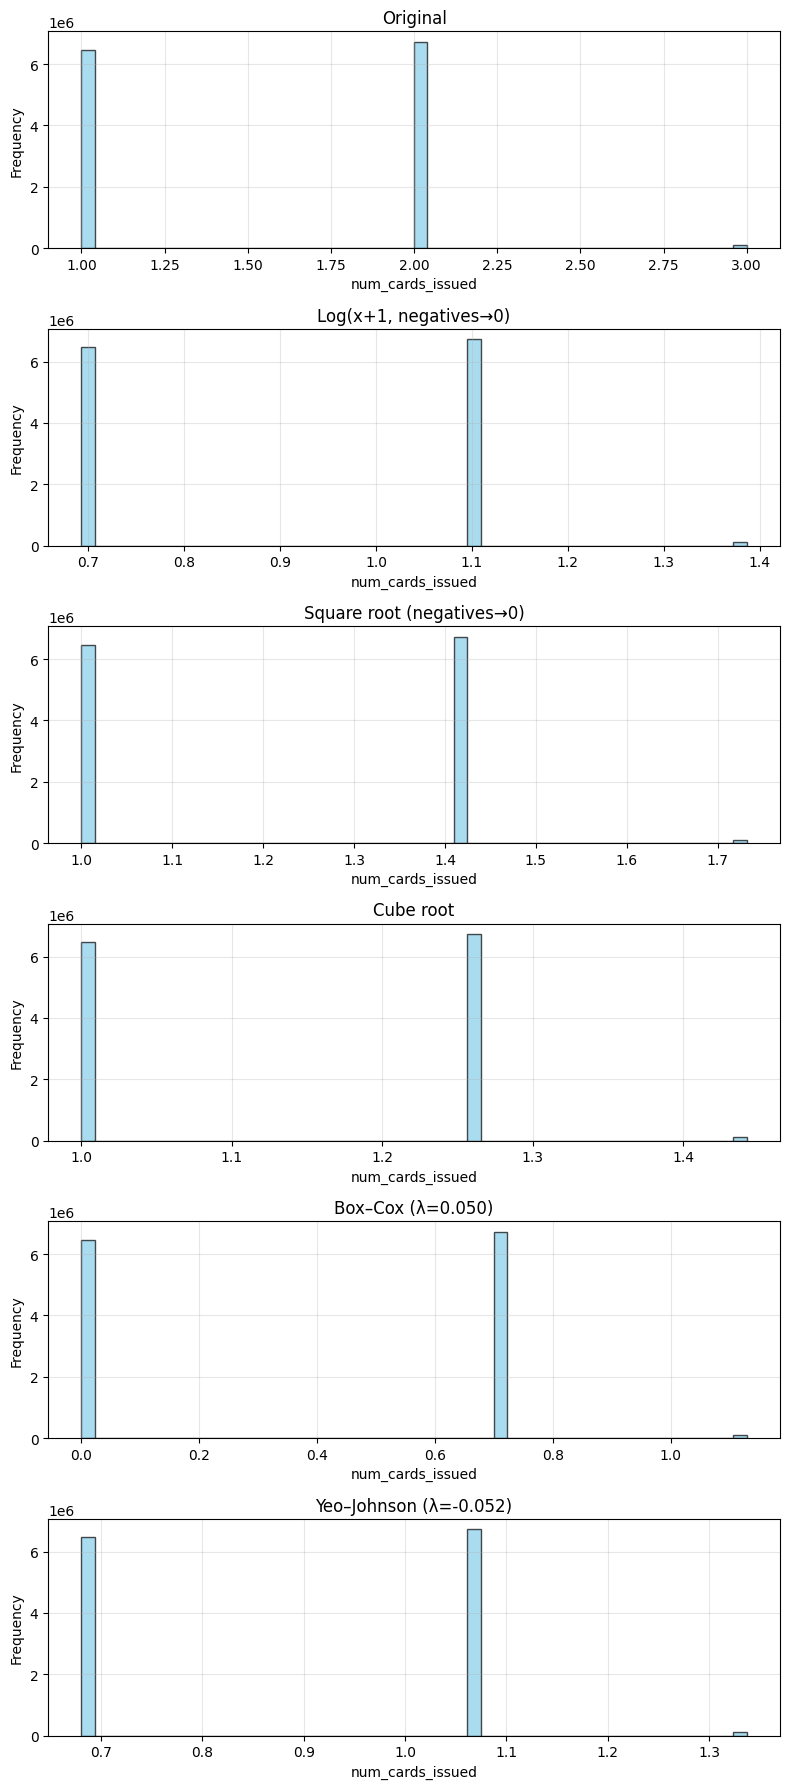

In [ ]:
### ÂñÆ‰∏ÄËÆäÊï∏Ê∏¨Ë©¶Áî®ÔºåÊü•ÁúãÂì™Á®ÆËΩâÊèõËºÉ‰Ω≥
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === Áµ±‰∏ÄË®≠ÂÆöË¶ÅÂàÜÊûêÁöÑÊ¨Ñ‰ΩçÂêçÁ®± ===
col = "num_cards_issued"

# === Ê∫ñÂÇôË≥áÊñôÔºà‰∏çÂãïÂéüÂßã mergedÔºâ ===
data = merged[col].copy()

# === Âª∫Á´ãÁµêÊûúÂÆπÂô® ===
results = []
transformations = []  # ÈÄôÂÄãÁî®‰æÜÂ≠òÊîæËΩâÊèõÂæåÁöÑË≥áÊñôÔºåÁî®‰æÜÁï´Âúñ

# === (0) ÂéüÂßãË≥áÊñô ===
orig_skew = stats.skew(data, bias=False, nan_policy='omit')
orig_kurt = stats.kurtosis(data, bias=False, nan_policy='omit')
results.append(['Original', orig_skew, orig_kurt])
transformations.append(('Original', data))

# === (1) Log ËΩâÊèõÔºà‰øùÁïô‰Ω†ÁöÑÂéüÂßãÈÇèËºØÔºâ===
log_base = np.where(data < 0, 0, data)
log_trans = np.log(log_base + 1)
results.append([
    'Log(x+1, negatives‚Üí0)',
    stats.skew(log_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(log_trans, bias=False, nan_policy='omit')
])
transformations.append(('Log(x+1, negatives‚Üí0)', log_trans))

# === (2) Âπ≥ÊñπÊ†πËΩâÊèõ ===
sqrt_base = np.where(data < 0, 0, data)
sqrt_trans = np.sqrt(sqrt_base)
results.append([
    'Square root (negatives‚Üí0)',
    stats.skew(sqrt_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(sqrt_trans, bias=False, nan_policy='omit')
])
transformations.append(('Square root (negatives‚Üí0)', sqrt_trans))

# === (3) Á´ãÊñπÊ†πËΩâÊèõ ===
cube_trans = np.cbrt(data)  # ÂèØÁõ¥Êé•ËôïÁêÜË≤†ÂÄº
results.append([
    'Cube root',
    stats.skew(cube_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(cube_trans, bias=False, nan_policy='omit')
])
transformations.append(('Cube root', cube_trans))

# === (4) Box‚ÄìCox ËΩâÊèõÔºàÈúÄÂÖ®ÁÇ∫Ê≠£ÂÄºÔºâ ===
boxcox_base = np.where(data <= 0, np.nan, data)
if np.all(np.isfinite(boxcox_base)) and np.nanmin(boxcox_base) > 0:
    boxcox_trans, lmbda = stats.boxcox(boxcox_base)
    results.append([
        f'Box‚ÄìCox (Œª={lmbda:.3f})',
        stats.skew(boxcox_trans, bias=False, nan_policy='omit'),
        stats.kurtosis(boxcox_trans, bias=False, nan_policy='omit')
    ])
    transformations.append((f'Box‚ÄìCox (Œª={lmbda:.3f})', boxcox_trans))
else:
    results.append(['Box‚ÄìCox (skip: nonpositive data)', np.nan, np.nan])

# === (5) Yeo‚ÄìJohnson ËΩâÊèõÔºàÂèØËôïÁêÜË≤†ÂÄºÔºâ ===
yj_trans, lmbda_yj = stats.yeojohnson(data)
results.append([
    f'Yeo‚ÄìJohnson (Œª={lmbda_yj:.3f})',
    stats.skew(yj_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(yj_trans, bias=False, nan_policy='omit')
])
transformations.append((f'Yeo‚ÄìJohnson (Œª={lmbda_yj:.3f})', yj_trans))

# === ÁµêÊûúË°®Ê†º ===
df_results = pd.DataFrame(results, columns=['Transformation', 'Skewness', 'Kurtosis'])
print(df_results)

# === (A) Áï´Âá∫ÊâÄÊúâÁõ¥ÊñπÂúñ ===
n = len(transformations)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 3*n))
plt.subplots_adjust(hspace=0.4)

for i, (title, series) in enumerate(transformations):
    ax = axes[i]
    series = pd.Series(series).dropna()
    ax.hist(series, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f"{title}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## ÂèÉÊï∏Ë™øÊï¥ÂèÉËÄÉ 
#fig, axes = plt.subplots(1, 2)
#axes[0].hist(data, bins=100)
#axes[1].hist(yj_trans, bins=100)

## ageÈÉΩ‰∏çÂª∫Ë≠∞ËΩâÊèõ‰ª•‰øùÁïôÂèÉÊï∏ÂèØËß£ÈáãÊÄß

## 04-2_ÂàÜÂâ≤Ë®ìÁ∑¥ÈõÜÂèäÊ∏¨Ë©¶ÈõÜ

In [10]:
#ÈÅ∏ÂèñÊï∏ÂÄºÂûãËÆäÊï∏
num_cols = merged.select_dtypes(include=['int64', 'float64','uint8']).columns
df=merged[num_cols]
#dropna
df_cleaned = df.dropna()
del df
#ÈÅøÂÖçÂÖ±Á∑öÊÄß
df_cleaned.drop(columns=["is_fraud_missing_flag","card_type_Debit (Prepaid)", "card_brand_Discover", "use_chip_Online Transaction"], inplace=True)
#ÂàÜÂâ≤Ë®ìÁ∑¥ÈõÜÂèäÊ∏¨Ë©¶ÈõÜ
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=888)

#Á¢∫Ë™çË≥áÊñôÂàÜÂ∏ÉÊÉÖÂΩ¢
del df_cleaned, merged
print(train_df['is_fraud'].value_counts(normalize=False))
print(test_df['is_fraud'].value_counts(normalize=False))

is_fraud
0    7121379
1      10591
Name: count, dtype: Int64
is_fraud
0    1780252
1       2741
Name: count, dtype: Int64


## 04-3(a)_Assumption:Linearity of Logit check

üìä Ëß£ËÆÄÂúñÂΩ¢
Ëã•ÈªûÂëàÁèæÂ§ßËá¥Áõ¥Á∑ö ‚Üí Ë©≤ËÆäÊï∏Ëàá logit Èóú‰øÇÁ∑öÊÄß ‚úÖ
Ëã•ÂëàÁèæÂΩéÊõ≤ÔºàU Âûã„ÄÅÂáπÂá∏Ôºâ ‚Üí Ë©≤ËÆäÊï∏‰∏çÁ∑öÊÄß ‚ùå
‚Üí Âª∫Ë≠∞Â∞çË©≤ËÆäÊï∏Âèñ log„ÄÅÂπ≥ÊñπÊ†π„ÄÅÊàñÂàáÂàÜÂàÜÁÆ±ÂÜç‰ΩøÁî®

In [16]:
from sklearn.model_selection import train_test_split

#sample_df, _ = train_test_split(
#    train_df,
#    train_size=1,
#    stratify=train_df['is_fraud'],
#    random_state=88
#)

## Box‚ÄìTidwell Ê™¢È©ó
import numpy as np
import pandas as pd
import statsmodels.api as sm

def box_tidwell_test(df, target='is_fraud'):
    """
    Ëá™ÂãïÂ∞çÈÄ£Á∫åËÆäÊï∏Âü∑Ë°å Box‚ÄìTidwell Ê™¢È©ó„ÄÇ
    ÈÅ©Áî®Êñº Logistic Regression ÁöÑ linearity of logit ÂÅáË®≠Ê™¢Êü•„ÄÇ
    """

    # 1Ô∏è‚É£ ÁØ©Âá∫ÈÄ£Á∫åËÆäÊï∏ÔºàÊéíÈô§‰∫åÂÖÉÊàñÈ°ûÂà•Ê¨Ñ‰ΩçÔºâ
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [c for c in numeric_cols if c != target]
    # ÊéíÈô§Âè™Êúâ 0/1 ÁöÑÊ¨Ñ‰ΩçÔºàÂ∏∏Ë¶ãÊñº flagÔºâ
    continuous_vars = [c for c in numeric_cols if df[c].nunique() > 2]

    print(f"Ê™¢Ê∏¨ÁöÑÈÄ£Á∫åËÆäÊï∏ÂÖ±Êúâ {len(continuous_vars)} ÂÄãÔºö{continuous_vars}\n")

    results = []

    for var in continuous_vars:
        temp = df[[target, var]].copy()
        # Ëã•ÊúâË≤†Êï∏Êàñ 0ÔºåÊîπÁÇ∫ NaNÔºàBox‚ÄìTidwell Ë¶ÅÊ±Ç X > 0Ôºâ
        temp[var] = np.where(temp[var] <= 0, np.nan, temp[var])
        temp = temp.dropna()

        # Âª∫Á´ã‰∫§‰∫íÈ†Ö Xi * log(Xi)
        temp[f'{var}_log'] = np.log(temp[var])
        temp[f'{var}_interaction'] = temp[var] * temp[f'{var}_log']

        # Logistic Regression Ê®°Âûã
        X = sm.add_constant(temp[[var, f'{var}_interaction']])
        y = temp[target]

        try:
            model = sm.Logit(y, X).fit(disp=False)
            p_value = model.pvalues.get(f'{var}_interaction', np.nan)
            results.append({
                'Variable': var,
                'p_value': p_value,
                'Linearity': '‚úÖ Á∑öÊÄßÂÅáË®≠ÊàêÁ´ã' if p_value >= 0.0001 else '‚ùå ‰∏çÁ∑öÊÄß'
            })
        except Exception as e:
            results.append({
                'Variable': var,
                'p_value': np.nan,
                'Linearity': f'‚ö†Ô∏è Ê®°ÂûãÁÑ°Ê≥ïÊî∂ÊñÇ ({e})'
            })

    results_df = pd.DataFrame(results).sort_values('p_value', na_position='last')
    return results_df

# ‚úÖ Âü∑Ë°åÊ™¢È©ó
#train_df["longitude"]=train_df["longitude"]*(-1)
bt_results = box_tidwell_test(train_df, target='is_fraud')

# Êü•ÁúãÁµêÊûú
print("\n=== Box‚ÄìTidwell Ê™¢È©óÁµêÊûú ===")
print(bt_results)


Ê™¢Ê∏¨ÁöÑÈÄ£Á∫åËÆäÊï∏ÂÖ±Êúâ 20 ÂÄãÔºö['transaction_id', 'client_id_x', 'card_id', 'amount', 'merchant_id', 'zip', 'mcc_code', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'card_number', 'cvv', 'num_cards_issued', 'credit_limit']


=== Box‚ÄìTidwell Ê™¢È©óÁµêÊûú ===
             Variable        p_value Linearity
3              amount   0.000000e+00     ‚ùå ‰∏çÁ∑öÊÄß
5                 zip  3.951655e-197     ‚ùå ‰∏çÁ∑öÊÄß
6            mcc_code  4.862038e-155     ‚ùå ‰∏çÁ∑öÊÄß
0      transaction_id   2.687609e-49     ‚ùå ‰∏çÁ∑öÊÄß
4         merchant_id   7.491374e-13     ‚ùå ‰∏çÁ∑öÊÄß
7         current_age   8.550089e-11     ‚ùå ‰∏çÁ∑öÊÄß
8      retirement_age   3.006206e-09     ‚ùå ‰∏çÁ∑öÊÄß
16        card_number   5.350365e-05     ‚ùå ‰∏çÁ∑öÊÄß
1         client_id_x   3.156159e-03  ‚úÖ Á∑öÊÄßÂÅáË®≠ÊàêÁ´ã
18   num_cards_issued   3.498041e-03  ‚úÖ Á∑öÊÄßÂÅáË®≠ÊàêÁ´ã
9            latitude   

In [14]:
## ÈáùÂ∞çlongitudeÊ®°ÂûãÁÑ°Ê≥ïÊî∂ÊñÇÁöÑËÆäÊï∏ÈáçÊñ∞Ê™¢Êü•

train_df["longitude"]=train_df["longitude"]*(-1)
bt_results = box_tidwell_test(train_df, target='is_fraud')
# Êü•ÁúãÁµêÊûú
print("\n=== Box‚ÄìTidwell Ê™¢È©óÁµêÊûú(‰øÆÊ≠£longitude) ===")
print(bt_results)
train_df["longitude"]=train_df["longitude"]*(-1)

Ê™¢Ê∏¨ÁöÑÈÄ£Á∫åËÆäÊï∏ÂÖ±Êúâ 20 ÂÄãÔºö['transaction_id', 'client_id_x', 'card_id', 'amount', 'merchant_id', 'zip', 'mcc_code', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'card_number', 'cvv', 'num_cards_issued', 'credit_limit']


=== Box‚ÄìTidwell Ê™¢È©óÁµêÊûú(‰øÆÊ≠£longitude) ===
             Variable        p_value Linearity
3              amount   0.000000e+00     ‚ùå ‰∏çÁ∑öÊÄß
5                 zip  3.951655e-197     ‚ùå ‰∏çÁ∑öÊÄß
6            mcc_code  4.862038e-155     ‚ùå ‰∏çÁ∑öÊÄß
0      transaction_id   2.687609e-49     ‚ùå ‰∏çÁ∑öÊÄß
4         merchant_id   7.491374e-13     ‚ùå ‰∏çÁ∑öÊÄß
7         current_age   8.550089e-11     ‚ùå ‰∏çÁ∑öÊÄß
8      retirement_age   3.006206e-09     ‚ùå ‰∏çÁ∑öÊÄß
16        card_number   5.350365e-05     ‚ùå ‰∏çÁ∑öÊÄß
1         client_id_x   3.156159e-03  ‚úÖ Á∑öÊÄßÂÅáË®≠ÊàêÁ´ã
18   num_cards_issued   3.498041e-03  ‚úÖ Á∑öÊÄßÂÅáË®≠ÊàêÁ´ã
9      

In [ ]:
#BY Linearity of Logit check drop ‰∏çÁ¨¶ÂêàÂÅáË®≠ÁöÑËÆäÊï∏ 
# ['amount','zip','mcc_code','transaction_id','merchant_id','current_age','retirement_age','card_number']

#bt_results[bt_results["Linearity"] == '‚ùå ‰∏çÁ∑öÊÄß']
nonlinear_vars = bt_results[bt_results["Linearity"] == '‚ùå ‰∏çÁ∑öÊÄß']["Variable"].tolist()
train_df.drop(columns=nonlinear_vars, inplace=True)

## 04-3(b1)_(Áï•04-3(a))Assumption:Avoid Multicollinearity

In [11]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    # 1. ‰øùÁïôÊï∏ÂÄºÊ¨Ñ‰Ωç
    df_num = df.select_dtypes(include=[np.number]).copy()

    # 2. Âº∑Âà∂ËΩâÊàê float64ÔºåÈÅøÂÖç Int64 / uint8 / object ÂïèÈ°å
    df_num = df_num.astype(np.float64)

    # 3. Ê™¢Êü• inf / NaN
    if not np.isfinite(df_num.values).all():
        raise ValueError("Data contains NaN or infinite values, cannot compute VIF.")

    # 4. Âä†‰∏äÊà™Ë∑ù
    X = sm.add_constant(df_num)

    # 5. Ë®àÁÆó VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                         for i in range(X.shape[1])]

    return vif

# ‰ΩøÁî®ÁØÑ‰æã
vif_result = calculate_vif(train_df)

/Users/andyw.p.chen/Documents/Project/2025_Fraud-Detection-project/virtual/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [12]:
print(vif_result.sort_values(by="VIF Factor", ascending=False))

                       features  VIF Factor
24                  card_number   22.243090
30              card_brand_Amex    4.419995
6                           zip    2.302851
17                    longitude    2.117485
18            per_capita_income    1.843738
11    use_chip_Chip Transaction    1.749374
12   use_chip_Swipe Transaction    1.718199
19                yearly_income    1.631605
20                   total_debt    1.538366
9              zip_missing_flag    1.466621
31        card_brand_Mastercard    1.453611
29              card_type_Debit    1.419777
8   merchant_state_missing_flag    1.416514
27                 credit_limit    1.305287
22             num_credit_cards    1.272109
14                  current_age    1.267739
28             card_type_Credit    1.170379
32              card_brand_Visa    1.040185
4                        amount    1.015890
2                   client_id_x    1.010012
5                   merchant_id    1.005297
13                     is_fraud 

In [13]:
##Á¨¨‰∏ÄÊ¨°ËôïÁêÜÂÖ±Á∑öÊÄß
train_df.drop(columns=["card_number"], inplace=True)
#ÂÜçÈáçË∑ë‰∏ÄÊ¨°VIF

In [14]:
vif_result = calculate_vif(train_df)
print(vif_result.sort_values(by="VIF Factor", ascending=False))
##ÁôºÁèæmissing_flagÁöÑÂÖ±Á∑öÊÄßÂïèÈ°åÔºåÊ±∫ÂÆö‰øùÁïôone hot encodingÈ´òvifÂÄºÁöÑËÆäÊï∏

                       features   VIF Factor
0                         const  3170.115231
12   use_chip_Swipe Transaction   569.054830
11    use_chip_Chip Transaction   524.232556
8   merchant_state_missing_flag   250.972845
9              zip_missing_flag    17.247316
30        card_brand_Mastercard    11.389838
31              card_brand_Visa    10.559310
18            per_capita_income     8.900011
19                yearly_income     8.879211
28              card_type_Debit     7.333878
27             card_type_Credit     6.184243
29              card_brand_Amex     3.329469
6                           zip     3.226834
17                    longitude     2.818701
26                 credit_limit     2.647422
1                transaction_id     1.934519
14                  current_age     1.719321
20                   total_debt     1.592677
22             num_credit_cards     1.325232
32                 has_chip_YES     1.153358
21                 credit_score     1.128865
7         

In [15]:
##Á¨¨2Ê¨°ËôïÁêÜÂÖ±Á∑öÊÄß
train_df.drop(columns=["merchant_state_missing_flag","per_capita_income"], inplace=True)
vif_result = calculate_vif(train_df)
print(vif_result.sort_values(by="VIF Factor", ascending=False))

                      features   VIF Factor
0                        const  1018.337627
11  use_chip_Swipe Transaction    38.189398
10   use_chip_Chip Transaction    35.395877
8             zip_missing_flag    16.206919
28       card_brand_Mastercard    11.385527
29             card_brand_Visa    10.556540
26             card_type_Debit     7.130560
25            card_type_Credit     6.035989
27             card_brand_Amex     3.329416
6                          zip     3.226014
16                   longitude     2.812307
24                credit_limit     2.491820
1               transaction_id     1.934437
17               yearly_income     1.783610
18                  total_debt     1.592368
13                 current_age     1.518092
20            num_credit_cards     1.324977
30                has_chip_YES     1.152971
19                credit_score     1.128540
7                     mcc_code     1.081394
14              retirement_age     1.060981
4                       amount  

In [16]:
##Á¨¨3Ê¨°ËôïÁêÜÂÖ±Á∑öÊÄß
train_df.drop(columns=["zip_missing_flag"], inplace=True)
vif_result = calculate_vif(train_df)
print(vif_result.sort_values(by="VIF Factor", ascending=False))

                      features  VIF Factor
0                        const  896.106321
27       card_brand_Mastercard   11.385510
28             card_brand_Visa   10.556537
25             card_type_Debit    7.130470
24            card_type_Credit    6.035986
9    use_chip_Chip Transaction    3.933513
10  use_chip_Swipe Transaction    3.916996
26             card_brand_Amex    3.329412
6                          zip    3.108594
15                   longitude    2.750853
23                credit_limit    2.491754
1               transaction_id    1.934436
16               yearly_income    1.782194
17                  total_debt    1.592355
12                 current_age    1.518029
19            num_credit_cards    1.324968
29                has_chip_YES    1.152920
18                credit_score    1.128527
7                     mcc_code    1.079670
13              retirement_age    1.060980
4                       amount    1.052440
14                    latitude    1.051585
22         

## 04-3(b2)_Assumption:Avoid Multicollinearity

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    # 1. ‰øùÁïôÊï∏ÂÄºÊ¨Ñ‰Ωç
    df_num = df.select_dtypes(include=[np.number]).copy()

    # 2. Âº∑Âà∂ËΩâÊàê float64ÔºåÈÅøÂÖç Int64 / uint8 / object ÂïèÈ°å
    df_num = df_num.astype(np.float64)

    # 3. Ê™¢Êü• inf / NaN
    if not np.isfinite(df_num.values).all():
        raise ValueError("Data contains NaN or infinite values, cannot compute VIF.")

    # 4. Âä†‰∏äÊà™Ë∑ù
    X = sm.add_constant(df_num)

    # 5. Ë®àÁÆó VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                         for i in range(X.shape[1])]

    return vif

# ‰ΩøÁî®ÁØÑ‰æã
vif_result = calculate_vif(train_df)




                       features   VIF Factor
0                         const  2710.301976
7    use_chip_Swipe Transaction   568.542716
6     use_chip_Chip Transaction   523.621826
3   merchant_state_missing_flag   250.878227
4              zip_missing_flag    16.626807
23        card_brand_Mastercard    11.385142
24              card_brand_Visa    10.553108
12                yearly_income     7.867869
11            per_capita_income     7.663705
21              card_type_Debit     7.306378


In [27]:
print(vif_result.sort_values(by="VIF Factor", ascending=False))

                       features   VIF Factor
0                         const  2710.301976
7    use_chip_Swipe Transaction   568.542716
6     use_chip_Chip Transaction   523.621826
3   merchant_state_missing_flag   250.878227
4              zip_missing_flag    16.626807
23        card_brand_Mastercard    11.385142
24              card_brand_Visa    10.553108
12                yearly_income     7.867869
11            per_capita_income     7.663705
21              card_type_Debit     7.306378
20             card_type_Credit     6.137878
22              card_brand_Amex     3.327756
19                 credit_limit     2.629707
13                   total_debt     1.359297
15             num_credit_cards     1.169906
14                 credit_score     1.090883
25                 has_chip_YES     1.082594
9                      latitude     1.044328
10                    longitude     1.044202
18             num_cards_issued     1.036174
8                      is_fraud     1.018439
2         

In [28]:
##Á¨¨‰∏ÄÊ¨°ËôïÁêÜÂÖ±Á∑öÊÄß
train_df.drop(columns=["merchant_state_missing_flag","yearly_income"], inplace=True)
#ÂÜçÈáçË∑ë‰∏ÄÊ¨°VIF


In [29]:
vif_result = calculate_vif(train_df)
print(vif_result.sort_values(by="VIF Factor", ascending=False))
##ÁôºÁèæmissing_flagÁöÑÂÖ±Á∑öÊÄßÂïèÈ°åÔºåÊ±∫ÂÆö‰øùÁïôone hot encodingÈ´òvifÂÄºÁöÑËÆäÊï∏

                      features  VIF Factor
0                        const  582.647941
6   use_chip_Swipe Transaction   37.742262
5    use_chip_Chip Transaction   34.851428
3             zip_missing_flag   15.595452
21       card_brand_Mastercard   11.372756
22             card_brand_Visa   10.544199
19             card_type_Debit    7.303603
18            card_type_Credit    6.137555
20             card_brand_Amex    3.327409
17                credit_limit    2.625084
10           per_capita_income    1.723141
11                  total_debt    1.223423
13            num_credit_cards    1.156715
12                credit_score    1.085277
23                has_chip_YES    1.081034
8                     latitude    1.043942
9                    longitude    1.038272
16            num_cards_issued    1.035959
7                     is_fraud    1.017547
2                      card_id    1.010516
14                 gender_Male    1.008535
1                  client_id_x    1.008426
15         

In [ ]:
train_df.drop(columns=["zip_missing_flag"], inplace=True)

In [32]:
vif_result = calculate_vif(train_df)
print(vif_result.sort_values(by="VIF Factor", ascending=False).head(10))
##ÁßªÈô§missing_flagÂÖ±Á∑öÊÄßÂïèÈ°åÔºåÂÜçÊ¨°Á¢∫Ë™ç

                      features  VIF Factor
0                        const  447.351192
20       card_brand_Mastercard   11.372751
21             card_brand_Visa   10.544197
18             card_type_Debit    7.303597
17            card_type_Credit    6.137550
19             card_brand_Amex    3.327405
5   use_chip_Swipe Transaction    2.651399
4    use_chip_Chip Transaction    2.649362
16                credit_limit    2.625074
9            per_capita_income    1.720801


In [33]:
import statsmodels.api as sm

# assume train_df is your dataframe and "is_fraud" is the dependent variable
y = train_df["is_fraud"]

# exclude the dependent variable itself
independent_vars = train_df.columns.drop("is_fraud")

results = []

for var in independent_vars:
    X = sm.add_constant(train_df[var])  # add intercept
    model = sm.Logit(y, X)
    try:
        result = model.fit(disp=False)
        coef = result.params[var]
        pval = np.around(result.pvalues[var], 4)
        results.append({"variable": var, "coefficient": coef, "p_value": pval})
    except Exception as e:
        results.append({"variable": var, "coefficient": None, "p_value": None})
        print(f"Skipped {var} due to error: {e}")

# convert to dataframe
summary_df = pd.DataFrame(results)

# optional: sort by p_value
summary_df = summary_df.sort_values("p_value", ascending=True).reset_index(drop=True)

print(summary_df)

                      variable  coefficient  p_value
0             num_credit_cards     0.110802   0.0000
1              card_type_Debit    -0.243131   0.0000
2          errors_missing_flag    -1.034501   0.0000
3    use_chip_Chip Transaction    -0.579217   0.0000
4   use_chip_Swipe Transaction    -2.282721   0.0000
5                     latitude    -0.008202   0.0000
6             card_type_Credit     0.118765   0.0000
7            per_capita_income    -0.023291   0.0000
8                   total_debt    -0.000632   0.0000
9                 credit_limit    -0.003152   0.0000
10                has_chip_YES     0.126625   0.0002
11                credit_score     0.000447   0.0027
12                   longitude     0.001722   0.0035
13                     card_id    -0.000015   0.0081
14             card_brand_Visa    -0.047866   0.0180
15             card_brand_Amex     0.081916   0.0324
16                 gender_Male    -0.032982   0.0902
17       card_brand_Mastercard    -0.021592   

## 04-4(a)_Forward only model fitting

In [21]:
#Stepwise Selection all variables

def stepwise_logit(train_df, target_col="is_fraud", entry_threshold=0.05):
    # ‚úÖ Á¢∫‰øùÁ¥¢ÂºïÂ∞çÈΩä
    train_df = train_df.reset_index(drop=True)
    y = train_df[target_col].reset_index(drop=True)
    
    candidate_vars = list(train_df.columns.drop(target_col))
    included_vars = []
    step_results = []
    
    # Base model (only intercept)
    X_base = sm.add_constant(pd.DataFrame({"intercept": [1]*len(train_df)}))
    base_model = sm.Logit(y, X_base).fit(disp=False)
    base_ll = -2 * base_model.llf
    step_results.append({"Step": 0, "Variable Entered": None, "-2 Log Likelihood": base_ll})
    
    print(f"Step 0: Base model estimated. -2LL = {base_ll:.3f}")
    
    step = 1
    while True:
        best_pval = 1
        best_var = None
        best_model = None
        
        for var in candidate_vars:
            try:
                X_temp = sm.add_constant(train_df[included_vars + [var]])
                model_temp = sm.Logit(y, X_temp).fit(disp=False)
                pval = model_temp.pvalues[var]
                
                if pval < best_pval:
                    best_pval = pval
                    best_var = var
                    best_model = model_temp
                    
            except Exception:
                continue
        
        if best_var is None or best_pval > entry_threshold:
            print("\n‚úÖ No more variables meet the entry threshold. Stepwise selection finished.")
            break
        
        included_vars.append(best_var)
        candidate_vars.remove(best_var)
        
        ll = -2 * best_model.llf
        step_results.append({"Step": step, "Variable Entered": best_var, "-2 Log Likelihood": ll})
        
        print(f"Step {step}: Added {best_var}, p = {best_pval:.4f}, -2LL = {ll:.3f}")
        step += 1
    
    print("\nFinal model summary:")
    print(best_model.summary())
    
    step_df = pd.DataFrame(step_results)
    return step_df, best_model

# üöÄ Âü∑Ë°å
step_df, final_model = stepwise_logit(train_df, target_col="is_fraud")
step_df


Step 0: Base model estimated. -2LL = 159110.612
Step 1: Added amount, p = 0.0000, -2LL = 156093.371


KeyboardInterrupt: 

## 04-4(b)_Forward/Backward v1

In [43]:
## ÁâàÊú¨1.0 (Âê´kÂÄºÊéßÂà∂Ôºå‰ΩÜ0ÊúÉÊúâÈåØË™§)
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats

def stepwise_logit_with_k_v1(train_df, test_df, dep_var="is_fraud", k=314657018,
                                 threshold_in=0.05, threshold_out=0.10):
    """
    Stepwise logistic regression (forward + backward) with flexible k control,
    and 3 formatted output tables like table_for_first_step().
    """

    y_train = train_df[dep_var]
    X_train = train_df.drop(columns=[dep_var])
    y_test = test_df[dep_var]
    X_test = test_df.drop(columns=[dep_var])

    included = []
    step = 0
    full_mode = (k == 314657018)
    base_model = None

    while True:
        step += 1
        changed = False

        # ---------- Forward Step ----------
        excluded = list(set(X_train.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_var in excluded:
            try:
                model = sm.Logit(y_train, sm.add_constant(X_train[included + [new_var]])).fit(disp=False)
                new_pvals[new_var] = model.pvalues[new_var]
            except Exception:
                new_pvals[new_var] = np.nan

        if new_pvals.empty:
            break

        best_pval = new_pvals.min()
        if best_pval < threshold_in:
            best_var = new_pvals.idxmin()
            included.append(best_var)
            changed = True

        # ---------- Backward Step ----------
        if included:
            model = sm.Logit(y_train, sm.add_constant(X_train[included])).fit(disp=False)
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                worst_var = pvalues.idxmax()
                included.remove(worst_var)
                changed = True

        # ---------- ÁµêÊùüÊ¢ù‰ª∂ ----------
        if not changed:
            break
        if not full_mode and len(included) >= k:
            break

    # ========= Final Model =========
    final_model = sm.Logit(y_train, sm.add_constant(X_train[included])).fit(disp=False)
    ll_full = final_model.llf
    ll_null = sm.Logit(y_train, sm.add_constant(np.ones(len(y_train)))).fit(disp=False).llf

    # 1Ô∏è‚É£ Overall Model Fit
    ll_diff = -2 * (ll_null - ll_full)
    df_diff = len(final_model.params) - 1
    p_value = stats.chi2.sf(ll_diff, df_diff)

    overall_fit = pd.DataFrame({
        "Measure": [
            "-2 Log Likelihood (‚àí2LL) value",
            "Cox and Snell R2",
            "Nagelkerke R2",
            "Pseudo R2 (McFadden)",
            "Hosmer-Lemeshow œá2"
        ],
        "Value": [
            round(-2 * ll_full, 3),
            round(1 - np.exp((2 / len(y_train)) * (ll_null - ll_full)), 3),
            round((1 - np.exp((2 / len(y_train)) * (ll_null - ll_full))) / (1 - np.exp(2 * ll_null / len(y_train))), 3),
            round(1 - (ll_full / ll_null), 3),
            round(ll_diff, 3)
        ],
        "Change_from_Base": [
            round(-2 * (ll_null - ll_full), 3),
            "", "", "", ""
        ],
        "Change_pvalue": [
            round(p_value, 4),
            "", "", "", ""
        ]
    })

    # 2Ô∏è‚É£ Variables in the Equation
    coef_df = pd.DataFrame({
        "Independent Variable": final_model.params.index,
        "B": final_model.params.values,
        "Std. Error": final_model.bse.values,
        "Wald": (final_model.params / final_model.bse) ** 2,
        "df": 1,
        "Sig.": final_model.pvalues.values,
        "Exp(B)": np.exp(final_model.params.values)
    })
    coef_df = coef_df.reset_index(drop=True)

    # 3Ô∏è‚É£ Variables Not in the Equation
    excluded_vars = [v for v in X_train.columns if v not in included]
    not_in_eq = []
    for var in excluded_vars:
        try:
            temp_model = sm.Logit(y_train, sm.add_constant(X_train[included + [var]])).fit(disp=False)
            lr_stat = -2 * (final_model.llf - temp_model.llf)
            p_val = stats.chi2.sf(lr_stat, 1)
            not_in_eq.append({"Independent Variable": var,
                              "Score Statistic (LRT)": round(lr_stat, 3),
                              "Significance": round(p_val, 4)})
        except Exception:
            not_in_eq.append({"Independent Variable": var,
                              "Score Statistic (LRT)": None,
                              "Significance": None})

    not_in_eq_df = pd.DataFrame(not_in_eq)

    # È°çÂ§ñÔºöTrain / Test Accuracy
    train_pred = (final_model.predict(sm.add_constant(X_train[included])) > 0.5).astype(int)
    test_pred = (final_model.predict(sm.add_constant(X_test[included])) > 0.5).astype(int)
    train_acc = (train_pred == y_train).mean()
    test_acc = (test_pred == y_test).mean()

    print(f"\n‚úÖ Stepwise completed with {len(included)} variables: {included}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    return overall_fit, coef_df, not_in_eq_df, final_model



from sklearn.metrics import confusion_matrix

def classification_table(model, df, target_col="is_fraud", cutoff=0.5):
    y_true = df[target_col].astype(int)
    X = sm.add_constant(df[model.params.index.drop("const")])
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob >= cutoff).astype(int)

    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    TP, FN, FP, TN = cm.ravel()

    fraud_total = TP + FN
    normal_total = FP + TN

    fraud_correct = TP / fraud_total if fraud_total > 0 else 0
    normal_correct = TN / normal_total if normal_total > 0 else 0
    overall_correct = (TP + TN) / (fraud_total + normal_total)

    table = pd.DataFrame({
        "Actual Group": ["Fraud (1)", "Normal (0)", "Total"],
        "Predicted Fraud (1)": [TP, FP, TP + FP],
        "Predicted Normal (0)": [FN, TN, FN + TN],
        "Total": [fraud_total, normal_total, fraud_total + normal_total],
        "% Correct": [
            round(fraud_correct * 100, 1),
            round(normal_correct * 100, 1),
            round(overall_correct * 100, 1),
        ],
    })
    return table


In [44]:
## ÁâàÊú¨1.0Áî®Ê≥ï k=1
overall_fit, coef_df, not_in_eq_df, model1_0 = stepwise_logit_with_k_v1(
    train_df, test_df, dep_var="is_fraud", k=0
)

print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")



# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model1_0, train_df, target_col="is_fraud")
test_table = classification_table(model1_0, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))



‚úÖ Stepwise completed with 1 variables: ['use_chip_Swipe Transaction']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  150529.771         8580.841           0.0
1                Cox and Snell R2       0.001                               
2                   Nagelkerke R2       0.055                               
3            Pseudo R2 (McFadden)       0.054                               
4              Hosmer-Lemeshow œá2    8580.841                               

=== Variables in the Equation ===
         Independent Variable         B  Std. Error           Wald  df  Sig.  \
0                       const -5.874597    0.010263  327657.488906   1   0.0   
1  use_chip_Swipe Transaction -2.282721    0.032252    5009.563547   1   0.0   

     Exp(B)  
0  0.002810  
1  0.102006  

=== Variables Not in the Equation ===
         Independent Variable  Sc

In [46]:
## ÁâàÊú¨1.0Áî®Ê≥ï k=2
overall_fit, coef_df, not_in_eq_df, model1_2 = stepwise_logit_with_k_v1(
    train_df, test_df, dep_var="is_fraud", k=2
)

print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")



# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model1_2, train_df, target_col="is_fraud")
test_table = classification_table(model1_2, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))



‚úÖ Stepwise completed with 2 variables: ['use_chip_Swipe Transaction', 'use_chip_Chip Transaction']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  140489.383        18621.229           0.0
1                Cox and Snell R2       0.003                               
2                   Nagelkerke R2       0.118                               
3            Pseudo R2 (McFadden)       0.117                               
4              Hosmer-Lemeshow œá2   18621.229                               

=== Variables in the Equation ===
         Independent Variable         B  Std. Error           Wald  df  Sig.  \
0                       const -4.775196    0.012014  157988.198965   1   0.0   
1  use_chip_Swipe Transaction -3.382122    0.032851   10599.503435   1   0.0   
2   use_chip_Chip Transaction -2.142826    0.023224    8513.341264   1   0.0   

     

In [47]:
## ÁâàÊú¨1.0Áî®Ê≥ï k=3
overall_fit, coef_df, not_in_eq_df, model1_3 = stepwise_logit_with_k_v1(
    train_df, test_df, dep_var="is_fraud", k=3
)

print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")



# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model1_3, train_df, target_col="is_fraud")
test_table = classification_table(model1_3, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))



‚úÖ Stepwise completed with 3 variables: ['use_chip_Swipe Transaction', 'use_chip_Chip Transaction', 'num_credit_cards']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  140105.114        19005.498           0.0
1                Cox and Snell R2       0.003                               
2                   Nagelkerke R2       0.121                               
3            Pseudo R2 (McFadden)       0.119                               
4              Hosmer-Lemeshow œá2   19005.498                               

=== Variables in the Equation ===
         Independent Variable         B  Std. Error          Wald  df  \
0                       const -5.233481    0.026969  37656.509502   1   
1  use_chip_Swipe Transaction -3.387820    0.032852  10634.301908   1   
2   use_chip_Chip Transaction -2.144975    0.023225   8529.465073   1   
3            n

In [48]:
## ÁâàÊú¨1.0Áî®Ê≥ï k=4
overall_fit, coef_df, not_in_eq_df, model1_4 = stepwise_logit_with_k_v1(
    train_df, test_df, dep_var="is_fraud", k=4
)

print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")



# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model1_4, train_df, target_col="is_fraud")
test_table = classification_table(model1_4, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))



‚úÖ Stepwise completed with 4 variables: ['use_chip_Swipe Transaction', 'use_chip_Chip Transaction', 'num_credit_cards', 'credit_limit']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  139677.397        19433.215           0.0
1                Cox and Snell R2       0.003                               
2                   Nagelkerke R2       0.123                               
3            Pseudo R2 (McFadden)       0.122                               
4              Hosmer-Lemeshow œá2   19433.215                               

=== Variables in the Equation ===
         Independent Variable         B  Std. Error          Wald  df  \
0                       const -4.827954    0.032721  21770.702363   1   
1  use_chip_Swipe Transaction -3.399624    0.032858  10705.083395   1   
2   use_chip_Chip Transaction -2.154422    0.023231   8600.907305   1  

In [ ]:
## ÁâàÊú¨1.0Áî®Ê≥ï k=1
overall_fit, coef_df, not_in_eq_df, model1_all = stepwise_logit_with_k_v1(
    train_df, test_df, dep_var="is_fraud", k=314657018
)

print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")



# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model1_all, train_df, target_col="is_fraud")
test_table = classification_table(model1_all, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))


## 04-4(c)_Forward/Backward v2

In [17]:
## ÁâàÊú¨2.0: ‰øÆÊ≠£k=0Ôºå‰∏¶Âä†ÂÖ•Âç≥ÊôÇËøΩËπ§
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats

def stepwise_logit_with_k_tables(train_df, test_df, dep_var="is_fraud", k=314657018,
                                 threshold_in=0.05, threshold_out=0.10, verbose=True):
    """
    Stepwise logistic regression (forward + backward) with flexible k control,
    and 3 formatted output tables like table_for_first_step().
    """

    y_train = train_df[dep_var]
    X_train = train_df.drop(columns=[dep_var])
    y_test = test_df[dep_var]
    X_test = test_df.drop(columns=[dep_var])

    included = []
    step = 0
    full_mode = (k == 314657018)

    # ========= üî∏ ÁâπÊÆäÊÉÖÊ≥ÅÔºök = 0ÔºåÂè™Ë∑ë intercept =========
    if k == 0:
        final_model = sm.Logit(y_train, sm.add_constant(np.ones(len(y_train)))).fit(disp=False)
        ll_full = final_model.llf
        ll_null = ll_full

        overall_fit = pd.DataFrame({
            "Measure": ["-2 Log Likelihood (‚àí2LL) value"],
            "Value": [round(-2 * ll_full, 3)],
            "Change_from_Base": [""],
            "Change_pvalue": [""]
        })

        coef_df = pd.DataFrame({
            "Independent Variable": ["const"],
            "B": final_model.params.values,
            "Std. Error": final_model.bse.values,
            "Wald": [np.nan],
            "df": [1],
            "Sig.": [""],
            "Exp(B)": np.exp(final_model.params.values)
        })

        not_in_eq_df = pd.DataFrame({
            "Independent Variable": X_train.columns,
            "Score Statistic (LRT)": [None]*len(X_train.columns),
            "Significance": [None]*len(X_train.columns)
        })

        print(f"\n‚úÖ Stepwise completed with 0 variables (Intercept only).")
        return overall_fit, coef_df, not_in_eq_df, final_model
    # ======================================================

    # ---------- Regular Stepwise ----------
    while True:
        step += 1
        changed = False

        # ---------- Forward Step ----------
        excluded = list(set(X_train.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_var in excluded:
            try:
                model = sm.Logit(y_train, sm.add_constant(X_train[included + [new_var]])).fit(disp=False)
                new_pvals[new_var] = model.pvalues[new_var]
            except Exception:
                new_pvals[new_var] = np.nan

        if new_pvals.empty:
            break

        best_pval = new_pvals.min()
        if best_pval < threshold_in:
            best_var = new_pvals.idxmin()
            included.append(best_var)
            changed = True
            if verbose:
                print(f"üü¢ Step {step}: Forward ‚Äî added variable: {best_var} (p={best_pval:.4g})")

        # ---------- Backward Step ----------
        if included:
            model = sm.Logit(y_train, sm.add_constant(X_train[included])).fit(disp=False)
            pvalues = model.pvalues.iloc[1:]  # skip intercept
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                worst_var = pvalues.idxmax()
                included.remove(worst_var)
                changed = True
                if verbose:
                    print(f"üî¥ Step {step}: Backward ‚Äî removed variable: {worst_var} (p={worst_pval:.4g})")

        # ---------- ÁµêÊùüÊ¢ù‰ª∂ ----------
        if not changed:
            if verbose:
                print(f"‚ö™ Step {step}: No change ‚Äî stopping iteration.")
            break
        if not full_mode and len(included) >= k:
            if verbose:
                print(f"üü° Reached k={k}, stopping after {len(included)} variables.")
            break

    # ========= Final Model =========
    final_model = sm.Logit(y_train, sm.add_constant(X_train[included])).fit(disp=False)
    ll_full = final_model.llf
    ll_null = sm.Logit(y_train, sm.add_constant(np.ones(len(y_train)))).fit(disp=False).llf

    # 1Ô∏è‚É£ Overall Model Fit
    ll_diff = -2 * (ll_null - ll_full)
    df_diff = len(final_model.params) - 1
    p_value = stats.chi2.sf(ll_diff, df_diff)

    overall_fit = pd.DataFrame({
        "Measure": [
            "-2 Log Likelihood (‚àí2LL) value",
            "Cox and Snell R2",
            "Nagelkerke R2",
            "Pseudo R2 (McFadden)",
            "Hosmer-Lemeshow œá2"
        ],
        "Value": [
            round(-2 * ll_full, 3),
            round(1 - np.exp((2 / len(y_train)) * (ll_null - ll_full)), 3),
            round((1 - np.exp((2 / len(y_train)) * (ll_null - ll_full))) / (1 - np.exp(2 * ll_null / len(y_train))), 3),
            round(1 - (ll_full / ll_null), 3),
            round(ll_diff, 3)
        ],
        "Change_from_Base": [
            round(-2 * (ll_null - ll_full), 3),
            "", "", "", ""
        ],
        "Change_pvalue": [
            round(p_value, 4),
            "", "", "", ""
        ]
    })

    # 2Ô∏è‚É£ Variables in the Equation
    coef_df = pd.DataFrame({
        "Independent Variable": final_model.params.index,
        "B": final_model.params.values,
        "Std. Error": final_model.bse.values,
        "Wald": (final_model.params / final_model.bse) ** 2,
        "df": 1,
        "Sig.": final_model.pvalues.values,
        "Exp(B)": np.exp(final_model.params.values)
    })
    coef_df = coef_df.reset_index(drop=True)

    # 3Ô∏è‚É£ Variables Not in the Equation
    excluded_vars = [v for v in X_train.columns if v not in included]
    not_in_eq = []
    for var in excluded_vars:
        try:
            temp_model = sm.Logit(y_train, sm.add_constant(X_train[included + [var]])).fit(disp=False)
            lr_stat = -2 * (final_model.llf - temp_model.llf)
            p_val = stats.chi2.sf(lr_stat, 1)
            not_in_eq.append({"Independent Variable": var,
                              "Score Statistic (LRT)": round(lr_stat, 3),
                              "Significance": round(p_val, 4)})
        except Exception:
            not_in_eq.append({"Independent Variable": var,
                              "Score Statistic (LRT)": None,
                              "Significance": None})

    not_in_eq_df = pd.DataFrame(not_in_eq)

    # È°çÂ§ñÔºöTrain / Test Accuracy
    train_pred = (final_model.predict(sm.add_constant(X_train[included])) > 0.5).astype(int)
    test_pred = (final_model.predict(sm.add_constant(X_test[included])) > 0.5).astype(int)
    train_acc = (train_pred == y_train).mean()
    test_acc = (test_pred == y_test).mean()

    print(f"\n‚úÖ Stepwise completed with {len(included)} variables: {included}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    return overall_fit, coef_df, not_in_eq_df, final_model

from sklearn.metrics import confusion_matrix

def classification_table(model, df, target_col="is_fraud", cutoff=0.5):
    y_true = df[target_col].astype(int)
    X = sm.add_constant(df[model.params.index.drop("const")])
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob >= cutoff).astype(int)

    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    TP, FN, FP, TN = cm.ravel()

    fraud_total = TP + FN
    normal_total = FP + TN

    fraud_correct = TP / fraud_total if fraud_total > 0 else 0
    normal_correct = TN / normal_total if normal_total > 0 else 0
    overall_correct = (TP + TN) / (fraud_total + normal_total)

    table = pd.DataFrame({
        "Actual Group": ["Fraud (1)", "Normal (0)", "Total"],
        "Predicted Fraud (1)": [TP, FP, TP + FP],
        "Predicted Normal (0)": [FN, TN, FN + TN],
        "Total": [fraud_total, normal_total, fraud_total + normal_total],
        "% Correct": [
            round(fraud_correct * 100, 1),
            round(normal_correct * 100, 1),
            round(overall_correct * 100, 1),
        ],
    })
    return table


In [18]:
## ÁâàÊú¨2.0Áî®Ê≥ï k=1

overall_fit, coef_df, not_in_eq_df, model_0 = stepwise_logit_with_k_tables(
    train_df, test_df, dep_var="is_fraud", k=1, verbose=True
)


print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")



# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model_0, train_df, target_col="is_fraud")
test_table = classification_table(model_0, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))


üü¢ Step 1: Forward ‚Äî added variable: amount (p=0)
üü° Reached k=1, stopping after 1 variables.

‚úÖ Stepwise completed with 1 variables: ['amount']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  156093.371         3017.241           0.0
1                Cox and Snell R2       0.000                               
2                   Nagelkerke R2       0.019                               
3            Pseudo R2 (McFadden)       0.019                               
4              Hosmer-Lemeshow œá2    3017.241                               

=== Variables in the Equation ===
  Independent Variable         B  Std. Error          Wald  df  Sig.    Exp(B)
0                const -7.969281    0.032682  59459.216608   1   0.0  0.000346
1               amount  0.419499    0.008177   2631.865503   1   0.0  1.521199

=== Variables Not in the Equation ===

In [19]:
## ÁâàÊú¨2.0 k=2
#overall_fit, coef_df, not_in_eq_df, model_2 = stepwise_logit_with_k_tables(
#    train_df, test_df, dep_var="is_fraud", k=0
#)

overall_fit, coef_df, not_in_eq_df, model_2 = stepwise_logit_with_k_tables(
    train_df, test_df, dep_var="is_fraud", k=2, verbose=True
)


print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")


# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model_2, train_df, target_col="is_fraud")
test_table = classification_table(model_2, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))


üü¢ Step 1: Forward ‚Äî added variable: amount (p=0)
üü¢ Step 2: Forward ‚Äî added variable: use_chip_Swipe Transaction (p=0)
üü° Reached k=2, stopping after 2 variables.

‚úÖ Stepwise completed with 2 variables: ['amount', 'use_chip_Swipe Transaction']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  147825.886        11284.726           0.0
1                Cox and Snell R2       0.002                               
2                   Nagelkerke R2       0.072                               
3            Pseudo R2 (McFadden)       0.071                               
4              Hosmer-Lemeshow œá2   11284.726                               

=== Variables in the Equation ===
         Independent Variable         B  Std. Error          Wald  df  Sig.  \
0                       const -7.302016    0.033401  47792.913754   1   0.0   
1            

In [20]:
## ÁâàÊú¨2.0Áî®Ê≥ï k=3
#overall_fit, coef_df, not_in_eq_df, model_3 = stepwise_logit_with_k_tables(
#    train_df, test_df, dep_var="is_fraud", k=0
#)

overall_fit, coef_df, not_in_eq_df, model_3 = stepwise_logit_with_k_tables(
    train_df, test_df, dep_var="is_fraud", k=3, verbose=True
)


print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")


# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model_3, train_df, target_col="is_fraud")
test_table = classification_table(model_3, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))


üü¢ Step 1: Forward ‚Äî added variable: amount (p=0)
üü¢ Step 2: Forward ‚Äî added variable: use_chip_Swipe Transaction (p=0)
üü¢ Step 3: Forward ‚Äî added variable: transaction_id (p=0)
üü° Reached k=3, stopping after 3 variables.

‚úÖ Stepwise completed with 3 variables: ['amount', 'use_chip_Swipe Transaction', 'transaction_id']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  143988.055        15122.557           0.0
1                Cox and Snell R2       0.002                               
2                   Nagelkerke R2       0.096                               
3            Pseudo R2 (McFadden)       0.095                               
4              Hosmer-Lemeshow œá2   15122.557                               

=== Variables in the Equation ===
         Independent Variable             B    Std. Error         Wald  df  \
0            

In [21]:
## ÁâàÊú¨2.0 k=4

overall_fit, coef_df, not_in_eq_df, model_4 = stepwise_logit_with_k_tables(
    train_df, test_df, dep_var="is_fraud", k=4, verbose=True
)


print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")

# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(model_4, train_df, target_col="is_fraud")
test_table = classification_table(model_4, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))


üü¢ Step 1: Forward ‚Äî added variable: amount (p=0)
üü¢ Step 2: Forward ‚Äî added variable: use_chip_Swipe Transaction (p=0)
üü¢ Step 3: Forward ‚Äî added variable: transaction_id (p=0)
üü¢ Step 4: Forward ‚Äî added variable: zip (p=0)
üü° Reached k=4, stopping after 4 variables.

‚úÖ Stepwise completed with 4 variables: ['amount', 'use_chip_Swipe Transaction', 'transaction_id', 'zip']
Train Accuracy: 0.9985, Test Accuracy: 0.9985
=== Overall Model Fit ===
                          Measure       Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  136604.133        22506.479           0.0
1                Cox and Snell R2       0.003                               
2                   Nagelkerke R2       0.143                               
3            Pseudo R2 (McFadden)       0.141                               
4              Hosmer-Lemeshow œá2   22506.479                               

=== Variables in the Equation ===
         Independent Variable    

In [22]:
## ÁâàÊú¨2.0 k=314657018 (Full Model)

overall_fit, coef_df, not_in_eq_df, final_model = stepwise_logit_with_k_tables(
    train_df, test_df, dep_var="is_fraud", k=314657018, verbose=True
)

print("=== Overall Model Fit ===")
print(overall_fit)

print("\n=== Variables in the Equation ===")
print(coef_df)

print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

print("\n================================================")
print("\n=== Accuracy in Training and Testing dataset ===")

# Step 3. Áî¢Âá∫Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜÁöÑÁµêÊûúË°®
train_table = classification_table(final_model, train_df, target_col="is_fraud")
test_table = classification_table(final_model, test_df, target_col="is_fraud")

print("\n=== Classification Matrix ‚Äî Training Sample ===")
print(train_table.to_string(index=False))
print("\n=== Classification Matrix ‚Äî Holdout (Test) Sample ===")
print(test_table.to_string(index=False))


üü¢ Step 1: Forward ‚Äî added variable: amount (p=0)
üü¢ Step 2: Forward ‚Äî added variable: use_chip_Swipe Transaction (p=0)
üü¢ Step 3: Forward ‚Äî added variable: transaction_id (p=0)
üü¢ Step 4: Forward ‚Äî added variable: zip (p=0)
üü¢ Step 5: Forward ‚Äî added variable: longitude (p=0)
üü¢ Step 6: Forward ‚Äî added variable: use_chip_Chip Transaction (p=8.927e-219)
üü¢ Step 7: Forward ‚Äî added variable: merchant_id (p=1.315e-187)
üü¢ Step 8: Forward ‚Äî added variable: credit_limit (p=5.107e-140)
üü¢ Step 9: Forward ‚Äî added variable: num_credit_cards (p=9.65e-79)
üü¢ Step 10: Forward ‚Äî added variable: errors_missing_flag (p=9.285e-50)
üü¢ Step 11: Forward ‚Äî added variable: yearly_income (p=5.524e-40)
üü¢ Step 12: Forward ‚Äî added variable: client_id_x (p=1.326e-13)
üü¢ Step 13: Forward ‚Äî added variable: latitude (p=9.614e-10)
üü¢ Step 14: Forward ‚Äî added variable: mcc_code (p=3.931e-10)
üü¢ Step 15: Forward ‚Äî added variable: has_chip_YES (p=1.953e-07)

In [23]:
## ‰∏Ä‰∫õÊ®°ÂûãÊ™¢È©óË®∫Êñ∑
def cutoff_analysis(model, df, target_col="is_fraud", cutoffs=None):
    """
    Áî¢Âá∫È°û‰ºº Table 8.7 ÁöÑÁµêÊûú
    """
    if cutoffs is None:
        cutoffs = np.arange(0, 1.01, 0.02)  # È†êË®≠ 0, 0.02, ..., 1
    
    y_true = df[target_col].astype(int)
    X = sm.add_constant(df[model.params.index.drop("const")])
    y_prob = model.predict(X)

    rows = []
    for cutoff in cutoffs:
        y_pred = (y_prob >= cutoff).astype(int)
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # Ê≥®ÊÑèÈ†ÜÂ∫è [0,1]
        TN, FP, FN, TP = cm.ravel()

        total = TP + TN + FP + FN
        accuracy = (TP + TN) / total if total > 0 else np.nan
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan
        specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan
        youden = sensitivity + specificity - 1 if not np.isnan(sensitivity) and not np.isnan(specificity) else np.nan
        ppv = TP / (TP + FP) if (TP + FP) > 0 else np.nan
        npv = TN / (TN + FN) if (TN + FN) > 0 else np.nan

        rows.append({
            "Cutoff": cutoff,
            "TN": TN, "FP": FP, "FN": FN, "TP": TP,
            "Accuracy": round(accuracy*100, 1),
            "Sensitivity": round(sensitivity*100, 1) if not np.isnan(sensitivity) else "NC",
            "Specificity": round(specificity*100, 1) if not np.isnan(specificity) else "NC",
            "Youden": round(youden*100, 1) if not np.isnan(youden) else "NC",
            "PPV": round(ppv*100, 1) if not np.isnan(ppv) else "NC",
            "NPV": round(npv*100, 1) if not np.isnan(npv) else "NC",
        })

    return pd.DataFrame(rows)

cutoff_table_all = cutoff_analysis(final_model, test_df, target_col="is_fraud",
                               cutoffs=[0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.7,0.8,0.9,1])

print(cutoff_table_all.to_string(index=False))



 Cutoff      TN      FP   FN   TP  Accuracy  Sensitivity  Specificity  Youden  PPV   NPV
   0.00       0 1780252    0 2741       0.2        100.0          0.0     0.0  0.2    NC
   0.10 1780213      39 2740    1      99.8          0.0        100.0     0.0  2.5  99.8
   0.20 1780250       2 2741    0      99.8          0.0        100.0    -0.0  0.0  99.8
   0.30 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.40 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.42 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.44 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.46 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.48 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.50 1780252       0 2741    0      99.8          0.0        100.0     0.0   NC  99.8
   0.52 1780252      

In [24]:
cutoffs_v1 = [round(x, 4) for x in np.arange(0, 0.11, 0.0005)]  # 0 ~ 0.2 ÈñìÈöî 0.02
cutoffs_v1 += [round(x, 4) for x in np.arange(0.2, 1.01, 0.1)]  # 0.3 ~ 1 ÈñìÈöî 0.1

cutoff_table_zoom = cutoff_analysis(final_model, test_df, target_col="is_fraud", cutoffs=cutoffs_v1)
print(cutoff_table_zoom.to_string(index=False))

 Cutoff      TN      FP   FN   TP  Accuracy  Sensitivity  Specificity  Youden  PPV    NPV
 0.0000       0 1780252    0 2741       0.2        100.0          0.0     0.0  0.2     NC
 0.0005 1128658  651594  205 2536      63.4         92.5         63.4    55.9  0.4  100.0
 0.0010 1321221  459031  296 2445      74.2         89.2         74.2    63.4  0.5  100.0
 0.0015 1414818  365434  385 2356      79.5         86.0         79.5    65.4  0.6  100.0
 0.0020 1472495  307757  485 2256      82.7         82.3         82.7    65.0  0.7  100.0
 0.0025 1512390  267862  582 2159      84.9         78.8         85.0    63.7  0.8  100.0
 0.0030 1543426  236826  667 2074      86.7         75.7         86.7    62.4  0.9  100.0
 0.0035 1569651  210601  763 1978      88.1         72.2         88.2    60.3  0.9  100.0
 0.0040 1592822  187430  839 1902      89.4         69.4         89.5    58.9  1.0   99.9
 0.0045 1613121  167131  921 1820      90.6         66.4         90.6    57.0  1.1   99.9
 0.0050 16

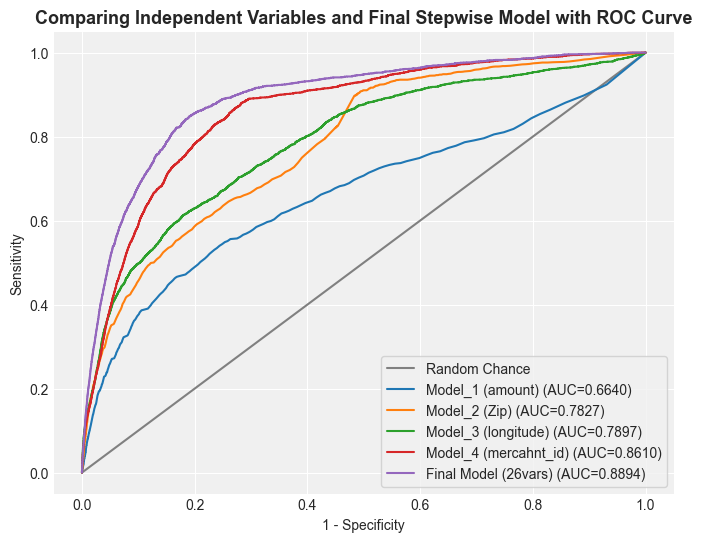

AUC values:
Model_1 (amount): 0.6640
Model_2 (Zip): 0.7827
Model_3 (longitude): 0.7897
Model_4 (mercahnt_id): 0.8610
Final Model (26vars): 0.8894


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


def plot_multiple_roc(models, model_names, test_df, target_col="is_fraud"):
    """
    models: list of fitted statsmodels.Logit models
    model_names: list of strings
    test_df: test dataframe
    """
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['axes.facecolor'] = '#f0f0f0'

    # Èö®Ê©üÊ©üÁéáÁ∑ö
    plt.plot([0, 1], [0, 1], color='gray', linestyle='-', label='Random Chance')

    auc_values = {}

    for model, name in zip(models, model_names):
        # ÂèñÂá∫Ê®°ÂûãËÆäÊï∏
        vars_used = model.params.index.drop("const")
        X_test = sm.add_constant(test_df[vars_used])

        # Ë®àÁÆóÈ†êÊ∏¨Ê©üÁéá
        y_true = test_df[target_col]
        y_score = model.predict(X_test)

        # ROC Êõ≤Á∑ö
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_val = roc_auc_score(y_true, y_score)
        auc_values[name] = auc_val

        plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.4f})")

    plt.title("Comparing Independent Variables and Final Stepwise Model with ROC Curve", fontsize=13, fontweight='bold')
    plt.xlabel("1 - Specificity")
    plt.ylabel("Sensitivity")
    plt.legend(loc="lower right", frameon=True)
    plt.show()

    # Âç∞Âá∫ AUC summary
    print("AUC values:")
    for name, val in auc_values.items():
        print(f"{name}: {val:.4f}")

# ÂÅáË®≠‰Ω†Â∑≤Á∂ìÊúâ‰ª•‰∏ãÊ®°ÂûãÔºö
# model_1 = sm.Logit(y_train, sm.add_constant(X_train[["X13"]])).fit(disp=False)
# model_2 = sm.Logit(y_train, sm.add_constant(X_train[["X17"]])).fit(disp=False)
# final_model = ...

# ÁØÑ‰æãÂëºÂè´
plot_multiple_roc(
    models=[model_0, model_2, model_3,model_4, final_model],
    model_names=["Model_1 (amount)", "Model_2 (Zip)", "Model_3 (longitude)","Model_4 (mercahnt_id)", "Final Model (26vars)"],
    test_df=test_df,
    target_col="is_fraud"
)


## 04-4(d) Â∞çÁÖßÂúñ amount Âèñlog only

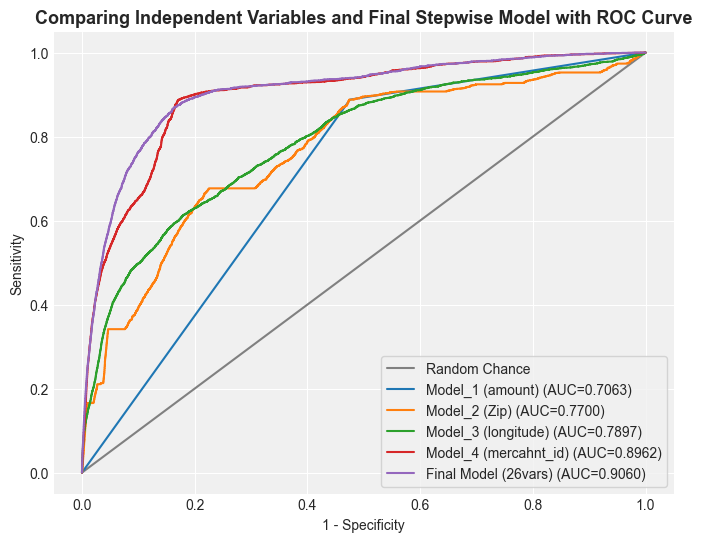

AUC values:
Model_1 (amount): 0.7063
Model_2 (Zip): 0.7700
Model_3 (longitude): 0.7897
Model_4 (mercahnt_id): 0.8962
Final Model (26vars): 0.9060


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_multiple_roc(models, model_names, test_df, target_col="is_fraud"):
    """
    models: list of fitted statsmodels.Logit models
    model_names: list of strings
    test_df: test dataframe
    """
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['axes.facecolor'] = '#f0f0f0'

    # Èö®Ê©üÊ©üÁéáÁ∑ö
    plt.plot([0, 1], [0, 1], color='gray', linestyle='-', label='Random Chance')

    auc_values = {}

    for model, name in zip(models, model_names):
        # ÂèñÂá∫Ê®°ÂûãËÆäÊï∏
        vars_used = model.params.index.drop("const")
        X_test = sm.add_constant(test_df[vars_used])

        # Ë®àÁÆóÈ†êÊ∏¨Ê©üÁéá
        y_true = test_df[target_col]
        y_score = model.predict(X_test)

        # ROC Êõ≤Á∑ö
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_val = roc_auc_score(y_true, y_score)
        auc_values[name] = auc_val

        plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.4f})")

    plt.title("Comparing Independent Variables and Final Stepwise Model with ROC Curve", fontsize=13, fontweight='bold')
    plt.xlabel("1 - Specificity")
    plt.ylabel("Sensitivity")
    plt.legend(loc="lower right", frameon=True)
    plt.show()

    # Âç∞Âá∫ AUC summary
    print("AUC values:")
    for name, val in auc_values.items():
        print(f"{name}: {val:.4f}")

# ÂÅáË®≠‰Ω†Â∑≤Á∂ìÊúâ‰ª•‰∏ãÊ®°ÂûãÔºö
# model_1 = sm.Logit(y_train, sm.add_constant(X_train[["X13"]])).fit(disp=False)
# model_2 = sm.Logit(y_train, sm.add_constant(X_train[["X17"]])).fit(disp=False)
# final_model = ...

# ÁØÑ‰æãÂëºÂè´
plot_multiple_roc(
    models=[model_0, model_2, model_3, model_4, final_model],
    model_names=["Model_1 (amount)", "Model_2 (Zip)", "Model_3 (longitude)","Model_4 (mercahnt_id)", "Final Model (26vars)"],
    test_df=test_df,
    target_col="is_fraud"
)


## 04-5(a)_ Model BY SkLEARN

In [26]:
included=['amount', 'use_chip_Swipe Transaction', 'transaction_id', 'zip', 'longitude', 'use_chip_Chip Transaction', 'merchant_id', 'credit_limit', 'num_credit_cards', 'errors_missing_flag', 'yearly_income', 'client_id_x', 'latitude', 'mcc_code', 'has_chip_YES', 'credit_score', 'card_type_Credit', 'retirement_age', 'card_type_Debit', 'total_debt', 'card_brand_Visa']
#['use_chip_Swipe Transaction', 'use_chip_Chip Transaction', 'num_credit_cards', 'credit_limit', 'errors_missing_flag', 'per_capita_income', 'has_chip_YES', 'client_id_x', 'card_type_Debit', 'card_id', 'longitude', 'latitude']

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from scipy.stats import chi2


def _compute_cov_and_se(model, X_scaled):
    """
    Ê†πÊìöÂ∑≤Ë®ìÁ∑¥ÁöÑ sklearn LogisticRegression model ËàáÂ∑≤ scale ÈÅéÁöÑ XÔºå
    ‰ΩøÁî® observed Fisher information matrix Ë®àÁÆóÂÖ±ËÆäÁï∞Êï∏Áü©Èô£ËàáÊ®ôÊ∫ñË™§„ÄÇ
    ÂõûÂÇ≥ (cov_matrix, se_array)Ôºõse_array ÂåÖÂê´ intercept ÁöÑ se Âú® index 0„ÄÇ
    """
    n = X_scaled.shape[0]
    X_design = np.hstack([np.ones((n, 1)), X_scaled])  # Âä†‰∏äÊà™Ë∑ùÊ¨Ñ
    p = model.predict_proba(X_scaled)[:, 1]
    W = p * (1 - p)
    XtWX = X_design.T @ (W[:, None] * X_design)

    try:
        cov = np.linalg.inv(XtWX)
    except np.linalg.LinAlgError:
        cov = np.linalg.pinv(XtWX)

    se = np.sqrt(np.maximum(np.diag(cov), 0.0))
    return cov, se


def compute_not_in_eq(y_train, X_train, included, excluded_vars):
    """
    Â∞çÊØè‰∏ÄÂÄã excluded variable ÂÅöÂñÆËÆäÈáè logisticÔºàÂê´ interceptÔºâ‰∏¶Ë®àÁÆó Wald & p-value„ÄÇ
    ÂõûÂÇ≥ DataFrameÔºåÊ¨Ñ‰Ωç: Independent Variable, Wald, Sig.
    """
    results = []
    for var in excluded_vars:
        try:
            X_var = X_train[[var]].astype(float)
            scaler = StandardScaler()
            X_var_scaled = scaler.fit_transform(X_var)

            model = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=1000)
            model.fit(X_var_scaled, y_train)

            coef = model.coef_[0][0]
            cov, se = _compute_cov_and_se(model, X_var_scaled)
            se_var = se[1] if len(se) > 1 else np.nan

            if se_var == 0 or np.isnan(se_var):
                wald = np.nan
                pval = np.nan
            else:
                wald = (coef / se_var) ** 2
                pval = float(chi2.sf(wald, df=1))

            results.append({
                "Independent Variable": var,
                "Wald": round(float(wald), 3) if not np.isnan(wald) else None,
                "Sig.": round(float(pval), 4) if not np.isnan(pval) else None
            })
        except Exception:
            results.append({
                "Independent Variable": var,
                "Wald": None,
                "Sig.": None
            })
    return pd.DataFrame(results)


def sklearn_logit_with_k(train_df, test_df, dep_var, included, k=314657018):
    """
    ‰ªø SPSS/Statmodels Ëº∏Âá∫Ê†ºÂºèÁöÑ sklearn logistic regressionÔºàÂê´ intercept, Std.Error, Wald, SigÔºâ
    ÂõûÂÇ≥: overall_fit, coef_df, not_in_eq_df, model, scaler
    """
    # === 1. Ê∫ñÂÇôË≥áÊñô ===
    y_train = train_df[dep_var].astype(int).values
    y_test = test_df[dep_var].astype(int).values

    if k == 314657018:
        selected_vars = included
    else:
        selected_vars = included[:k]

    X_train = train_df[selected_vars].astype(float).copy()
    X_test = test_df[selected_vars].astype(float).copy()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # === 2. Âª∫Á´ãÊ®°Âûã ===
    model = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=2000)
    model.fit(X_train_scaled, y_train)

    # === 3. Ê®°ÂûãÊì¨ÂêàÂ∫¶ ===
    base_ll = log_loss(y_train, np.full_like(y_train, y_train.mean(), dtype=float), normalize=False)
    full_ll = log_loss(y_train, model.predict_proba(X_train_scaled)[:, 1], normalize=False)
    llr = base_ll - full_ll
    n = len(y_train)

    r2_cox_snell = 1 - np.exp(-(2.0 / n) * llr)
    denom = 1 - np.exp((-2.0 / n) * base_ll)
    r2_nagelkerke = r2_cox_snell / denom if denom != 0 else np.nan
    r2_mcfadden = 1 - (full_ll / base_ll) if base_ll != 0 else np.nan

    LR_chi2 = 2.0 * llr
    LR_df = len(selected_vars)
    LR_pvalue = float(chi2.sf(LR_chi2, df=LR_df))

    overall_fit = pd.DataFrame({
        "Measure": [
            "-2 Log Likelihood (‚àí2LL) value",
            "Cox and Snell R2",
            "Nagelkerke R2",
            "Pseudo R2 (McFadden)",
            "Likelihood Ratio œá2",
        ],
        "Value": [
            round(2.0 * full_ll, 3),
            round(r2_cox_snell, 3),
            round(r2_nagelkerke, 3),
            round(r2_mcfadden, 3),
            round(LR_chi2, 3)
        ],
        "Change_from_Base": [round(LR_chi2, 3), "", "", "", ""],
        "Change_pvalue": [round(LR_pvalue, 6), "", "", "", ""]
    })

    # === 4. ËÆäÊï∏‰øÇÊï∏Ë°®ÔºàÂê´ interceptÔºâ===
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    cov, se_all = _compute_cov_and_se(model, X_train_scaled)
    se_beta = se_all[1:]  # predictors
    se_intercept = se_all[0]

    # Ë®àÁÆó Wald Ëàá p ÂÄº
    wald_vals, pvals = [], []
    for b, se in zip(coef, se_beta):
        if se == 0 or np.isnan(se):
            wald_vals.append(np.nan)
            pvals.append(np.nan)
        else:
            w = (b / se) ** 2
            wald_vals.append(w)
            pvals.append(float(chi2.sf(w, df=1)))

    intercept_wald = (intercept / se_intercept) ** 2 if se_intercept != 0 else np.nan
    intercept_pval = float(chi2.sf(intercept_wald, df=1)) if not np.isnan(intercept_wald) else np.nan

    coef_df = pd.DataFrame({
        "Independent Variable": ["(Intercept)"] + selected_vars,
        "B": np.round([intercept] + coef.tolist(), 6),
        "Std. Error": [round(float(x), 6) for x in se_all],
        "Wald": [round(float(intercept_wald), 3)] +
                [round(float(x), 3) if not np.isnan(x) else None for x in wald_vals],
        "df": [1] * (len(coef) + 1),
        "Sig.": [round(float(intercept_pval), 6)] +
                [round(float(x), 6) if not np.isnan(x) else None for x in pvals],
        "Exp(B)": np.round(np.exp([intercept] + coef.tolist()), 6)
    })

    # === 5. Variables not in Equation ===
    excluded_vars = [v for v in included if v not in selected_vars]
    not_in_eq_df = compute_not_in_eq(y_train, train_df, selected_vars, excluded_vars)

    return overall_fit, coef_df, not_in_eq_df, model, scaler


In [28]:
overall_fit, coef_df, not_in_eq_df, skmodel, scaler = sklearn_logit_with_k(
    train_df, test_df, dep_var="is_fraud", included=included, k=314657018
)

print("=== Overall Model Fit ===")
print(overall_fit)
print("\n=== Variables in the Equation ===")
print(coef_df)
print("\n=== Variables Not in the Equation ===")
print(not_in_eq_df)

=== Overall Model Fit ===
                          Measure        Value Change_from_Base Change_pvalue
0  -2 Log Likelihood (‚àí2LL) value  5926638.560     -5767527.948           1.0
1                Cox and Snell R2       -1.245                               
2                   Nagelkerke R2      -56.429                               
3            Pseudo R2 (McFadden)      -36.249                               
4             Likelihood Ratio œá2 -5767527.948                               

=== Variables in the Equation ===
          Independent Variable         B  Std. Error         Wald  df  \
0                  (Intercept) -1.585618    0.001330  1420958.556   1   
1                       amount  0.298740    0.001192    62809.315   1   
2   use_chip_Swipe Transaction -1.222153    0.001954   391149.994   1   
3               transaction_id -0.000932    0.001525        0.373   1   
4                          zip -1.633298    0.002250   526803.187   1   
5                    longitude

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

def cutoff_analysis_sklearn(model, scaler, df, included_vars, target_col="is_fraud", cutoffs=None):
    """
    Â∞ç sklearn logistic regression Ê®°ÂûãÂÅö cutoff ÂàÜÊûê
    ÔºàÁî¢Âá∫È°û‰ºº SPSS Table 8.7 ÁöÑÁµêÊûúÔºâ
    """
    if cutoffs is None:
        cutoffs = np.arange(0, 1.01, 0.02)

    # Ê∫ñÂÇôË≥áÊñô
    y_true = df[target_col].astype(int).values

    # ‰øùË≠âËàá scaler.feature_names_in_ Â∞çÈΩä
    available_cols = [col for col in scaler.feature_names_in_ if col in df.columns]
    X = df[available_cols].astype(float).copy()
    X_scaled = scaler.transform(X)

    # È†êÊ∏¨Ê©üÁéá
    y_prob = model.predict_proba(X_scaled)[:, 1]

    rows = []
    for cutoff in cutoffs:
        y_pred = (y_prob >= cutoff).astype(int)
        cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
        if cm.shape == (2, 2):
            TP, FN, FP, TN = cm.ravel()
        else:
            TP = FN = FP = TN = 0

        total = TP + TN + FP + FN
        accuracy = (TP + TN) / total if total > 0 else np.nan
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan
        specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan
        youden = (sensitivity + specificity - 1) if (
            not np.isnan(sensitivity) and not np.isnan(specificity)
        ) else np.nan
        ppv = TP / (TP + FP) if (TP + FP) > 0 else np.nan
        npv = TN / (TN + FN) if (TN + FN) > 0 else np.nan

        rows.append({
            "Cutoff": cutoff,
            "TN": TN, "FP": FP, "FN": FN, "TP": TP,
            "Accuracy": round(accuracy * 100, 1) if not np.isnan(accuracy) else "NC",
            "Sensitivity": round(sensitivity * 100, 1) if not np.isnan(sensitivity) else "NC",
            "Specificity": round(specificity * 100, 1) if not np.isnan(specificity) else "NC",
            "Youden": round(youden * 100, 1) if not np.isnan(youden) else "NC",
            "PPV": round(ppv * 100, 1) if not np.isnan(ppv) else "NC",
            "NPV": round(npv * 100, 1) if not np.isnan(npv) else "NC",
        })

    return pd.DataFrame(rows)


In [30]:
# === ÁØÑ‰æãÂü∑Ë°å ===
cutoff_table_all = cutoff_analysis_sklearn(
    skmodel,            # ‰æÜËá™ sklearn_logit_with_k ÁöÑ model
    scaler,           # Â∞çÊáâÁöÑÊ®ôÊ∫ñÂåñÂô®
    test_df,          # Ê∏¨Ë©¶Ë≥áÊñô
    included[:3],     # ËàáÊ®°ÂûãÁõ∏ÂêåÁöÑËá™ËÆäÊï∏
    target_col="is_fraud",
    cutoffs=[0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.7,0.8,0.9,1]
)

print(cutoff_table_all.to_string(index=False))

 Cutoff      TN      FP   FN   TP  Accuracy  Sensitivity  Specificity  Youden  PPV    NPV
   0.00       0 1780252    0 2741       0.2        100.0          0.0     0.0  0.2     NC
   0.10  725940 1054312  100 2641      40.9         96.4         40.8    37.1  0.2  100.0
   0.20 1061801  718451  175 2566      59.7         93.6         59.6    53.3  0.4  100.0
   0.30 1262748  517504  216 2525      71.0         92.1         70.9    63.1  0.5  100.0
   0.40 1400352  379900  273 2468      78.7         90.0         78.7    68.7  0.6  100.0
   0.42 1420855  359397  285 2456      79.8         89.6         79.8    69.4  0.7  100.0
   0.44 1439878  340374  298 2443      80.9         89.1         80.9    70.0  0.7  100.0
   0.46 1456401  323851  313 2428      81.8         88.6         81.8    70.4  0.7  100.0
   0.48 1471536  308716  338 2403      82.7         87.7         82.7    70.3  0.8  100.0
   0.50 1485503  294749  363 2378      83.4         86.8         83.4    70.2  0.8  100.0
   0.52 14

## 04-5(b)_Â∞çÊáâ sklearn ÁâàÊú¨ÁöÑÂ§öÊ®°Âûã ROC Áπ™Âúñ

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_multiple_roc_sklearn(models, scalers, model_names, test_df, included_var_sets, target_col="is_fraud"):
    """
    Â∞çÊáâ sklearn LogisticRegression ÁâàÊú¨ÁöÑÂ§öÊ®°Âûã ROC ÂúñÊØîËºÉ
    
    models: list of fitted sklearn models
    scalers: list ofÂ∞çÊáâÁöÑ StandardScalerÔºàÊØèÂÄãÊ®°Âûã‰∏ÄÂÄãÔºâ
    model_names: list ofÊ®°ÂûãÂêçÁ®±
    test_df: Ê∏¨Ë©¶Ë≥áÊñô
    included_var_sets: list ofÂêÑÊ®°Âûã‰ΩøÁî®ÁöÑËÆäÊï∏ÂêçÁ®±Ôºàlist of listÔºâ
    target_col: ÁõÆÊ®ôËÆäÊï∏ÂêçÁ®±
    """
    plt.figure(figsize=(8, 6))
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['axes.facecolor'] = '#f0f0f0'

    # Èö®Ê©üÊ©üÁéáÁ∑ö
    plt.plot([0, 1], [0, 1], color='gray', linestyle='-', label='Random Chance')

    auc_values = {}

    for model, scaler, name, vars_used in zip(models, scalers, model_names, included_var_sets):
        # Ê∫ñÂÇôÊ∏¨Ë©¶Ë≥áÊñô
        X_test = test_df[vars_used].astype(float)
        X_test_scaled = scaler.transform(X_test)
        y_true = test_df[target_col].astype(int)

        # Ê®°ÂûãÈ†êÊ∏¨Ê©üÁéá
        y_score = model.predict_proba(X_test_scaled)[:, 1]

        # ROC Êõ≤Á∑öËàá AUC
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_val = roc_auc_score(y_true, y_score)
        auc_values[name] = auc_val

        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc_val:.4f})")

    plt.title("Comparing Independent Variables and Final Stepwise Model with ROC Curve", fontsize=13, fontweight='bold')
    plt.xlabel("1 - Specificity (False Positive Rate)")
    plt.ylabel("Sensitivity (True Positive Rate)")
    plt.legend(loc="lower right", frameon=True)
    plt.tight_layout()
    plt.show()

    # Âç∞Âá∫ AUC Summary
    print("AUC values:")
    for name, val in auc_values.items():
        print(f"{name}: {val:.4f}")


In [32]:
# ÁØÑ‰æãÔºöÂª∫Á´ãÂõõÂÄã‰∏çÂêåËÆäÊï∏ÈõÜÁöÑÊ®°Âûã
skmodel_1_info = sklearn_logit_with_k(train_df, test_df, dep_var="is_fraud", included=included, k=1)
skmodel_2_info = sklearn_logit_with_k(train_df, test_df, dep_var="is_fraud", included=included, k=2)
skmodel_3_info = sklearn_logit_with_k(train_df, test_df, dep_var="is_fraud", included=included, k=3)
skmodel_final_info = sklearn_logit_with_k(train_df, test_df, dep_var="is_fraud", included=included, k=314657018)


# Ëß£ÂåÖÁµêÊûú (overall_fit, coef_df, not_in_eq_df, model, scaler)
_, _, _, skmodel_1, skscaler_1 = skmodel_1_info
_, _, _, skmodel_2, skscaler_2 = skmodel_2_info
_, _, _, skmodel_3, skscaler_3 = skmodel_3_info
_, _, _, skmodel_final, skscaler_final = skmodel_final_info

# Â∞çÊáâÁöÑËÆäÊï∏ÈõÜ
vars_1 = included[:1]
vars_2 = included[:2]
vars_3 = included[:3]
vars_final = included  # ÂÖ®ÈÉ®ËÆäÊï∏

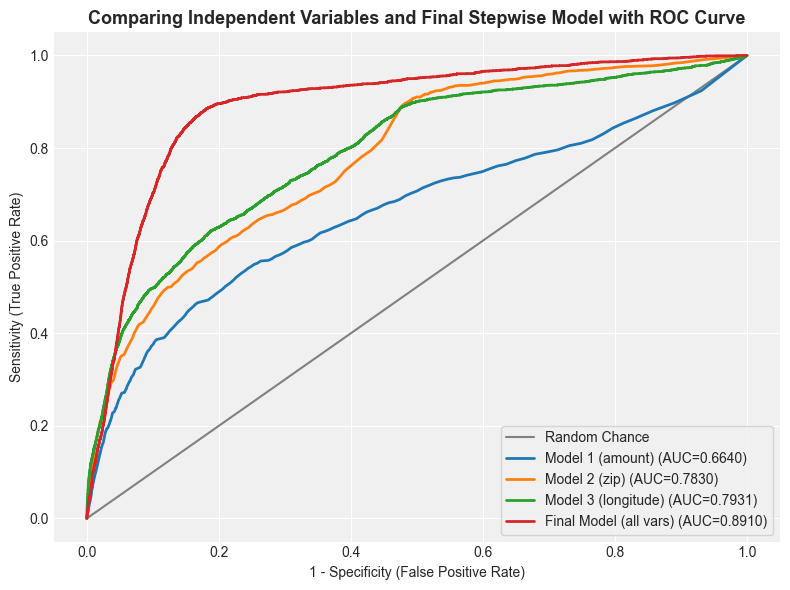

AUC values:
Model 1 (amount): 0.6640
Model 2 (zip): 0.7830
Model 3 (longitude): 0.7931
Final Model (all vars): 0.8910


In [33]:
plot_multiple_roc_sklearn(
    models=[skmodel_1, skmodel_2, skmodel_3, skmodel_final],
    scalers=[skscaler_1, skscaler_2, skscaler_3, skscaler_final],
    model_names=[
        "Model 1 (amount)",
        "Model 2 (zip)",
        "Model 3 (longitude)",
        "Final Model (all vars)"
    ],
    test_df=test_df,
    included_var_sets=[vars_1, vars_2, vars_3, vars_final],
    target_col="is_fraud"
)

ÂÖ±Êúâ 21 ÂÄãËÆäÊï∏ÂèØ‰æõÂª∫Ê®°
Á∏ΩÂÖ±Âª∫Á´ã 22 ÂÄãÊ®°ÂûãÔºàÂê´ÊúÄÁµÇÊ®°ÂûãÔºâ


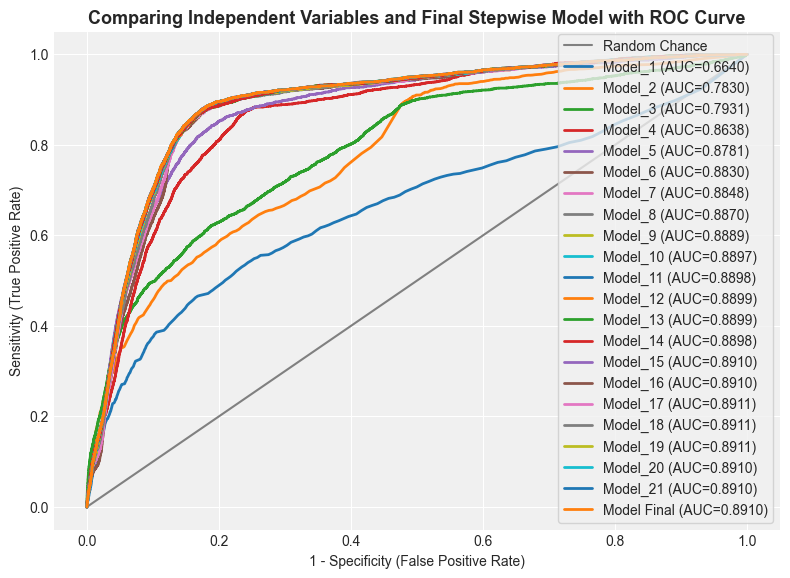

AUC values:
Model_1: 0.6640
Model_2: 0.7830
Model_3: 0.7931
Model_4: 0.8638
Model_5: 0.8781
Model_6: 0.8830
Model_7: 0.8848
Model_8: 0.8870
Model_9: 0.8889
Model_10: 0.8897
Model_11: 0.8898
Model_12: 0.8899
Model_13: 0.8899
Model_14: 0.8898
Model_15: 0.8910
Model_16: 0.8910
Model_17: 0.8911
Model_18: 0.8911
Model_19: 0.8911
Model_20: 0.8910
Model_21: 0.8910
Model Final: 0.8910


In [ ]:
# Ë®àÁÆó included Èï∑Â∫¶
n_vars = len(included)
print(f"ÂÖ±Êúâ {n_vars} ÂÄãËÆäÊï∏ÂèØ‰æõÂª∫Ê®°")

# Âª∫Á´ãÊ®°ÂûãËàá scaler ÁöÑÂÆπÂô®
models = []
scalers = []
model_names = []
included_var_sets = []

# Ëá™ÂãïËø¥ÂúàÂª∫Á´ãÊ®°Âûã
for k in range(1, n_vars + 1):
    model_info = sklearn_logit_with_k(
        train_df, test_df, dep_var="is_fraud", included=included, k=k
    )
    _, _, _, model, scaler = model_info
    
    models.append(model)
    scalers.append(scaler)
    included_var_sets.append(included[:k])
    model_names.append(f"Model_{k}")

# ÊúÄÂæå‰∏ÄÂÄãÂÆåÊï¥Ê®°Âûã (Final Model)
model_final_info = sklearn_logit_with_k(
    train_df, test_df, dep_var="is_fraud", included=included, k=314657018
)
_, _, _, model_final, scaler_final = model_final_info

models.append(model_final)
scalers.append(scaler_final)
included_var_sets.append(included)
model_names.append("Model Final")

print(f"Á∏ΩÂÖ±Âª∫Á´ã {len(models)} ÂÄãÊ®°ÂûãÔºàÂê´ÊúÄÁµÇÊ®°ÂûãÔºâ")

# üîπ Áπ™Ë£ΩÂ§öÊ®°Âûã ROC ÊØîËºÉÂúñ
plot_multiple_roc_sklearn(
    models=models,
    scalers=scalers,
    model_names=model_names,
    test_df=test_df,
    included_var_sets=included_var_sets,
    target_col="is_fraud"
)

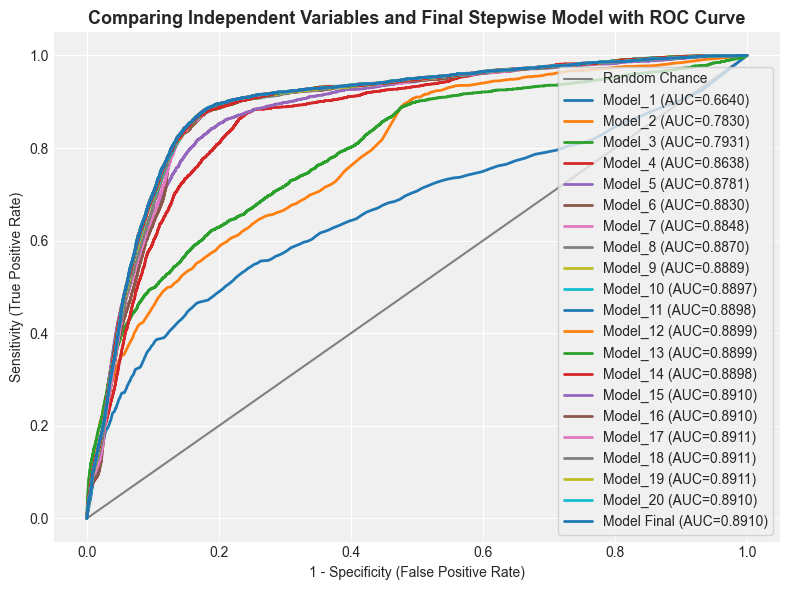

AUC values:
Model_1: 0.6640
Model_2: 0.7830
Model_3: 0.7931
Model_4: 0.8638
Model_5: 0.8781
Model_6: 0.8830
Model_7: 0.8848
Model_8: 0.8870
Model_9: 0.8889
Model_10: 0.8897
Model_11: 0.8898
Model_12: 0.8899
Model_13: 0.8899
Model_14: 0.8898
Model_15: 0.8910
Model_16: 0.8910
Model_17: 0.8911
Model_18: 0.8911
Model_19: 0.8911
Model_20: 0.8910
Model Final: 0.8910


In [37]:
# ÁßªÈô§ÈáçË§áÊ®°ÂûãÔºà‰æãÂ¶Ç Model_21Ôºâ
duplicate_index = model_names.index("Model_21")
del models[duplicate_index]
del scalers[duplicate_index]
del included_var_sets[duplicate_index]
del model_names[duplicate_index]

# üîπ Áπ™Ë£ΩÂ§öÊ®°Âûã ROC ÊØîËºÉÂúñ
plot_multiple_roc_sklearn(
    models=models,
    scalers=scalers,
    model_names=model_names,
    test_df=test_df,
    included_var_sets=included_var_sets,
    target_col="is_fraud"
)



In [47]:
from sklearn.metrics import f1_score

# 1Ô∏è‚É£ ÂèñÂá∫Ê∏¨Ë©¶Ë≥áÊñô‰∏≠Ê®°ÂûãÁî®Âà∞ÁöÑÊ¨Ñ‰Ωç
X_test = test_df[included].astype(float)

# 2Ô∏è‚É£ ‰ΩøÁî®Ë®ìÁ∑¥ÊôÇÁöÑ scaler Ê®ôÊ∫ñÂåñ
X_test_scaled = scaler.transform(X_test)

# 3Ô∏è‚É£ ÂèñÂá∫ÁúüÂØ¶Ê®ôÁ±§
y_test = test_df["is_fraud"].astype(int)

# 4Ô∏è‚É£ Ê®°ÂûãÈ†êÊ∏¨Ê©üÁéáËàáËá™Ë®Ç cutoff
y_prob =  skmodel.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_prob >= 0.48).astype(int)

# 5Ô∏è‚É£ Ë®àÁÆó F1-score
f1 = f1_score(y_test, y_pred_custom)

print("F1 Score (cutoff=0.48):", round(f1, 4))

F1 Score (cutoff=0.48): 0.0153
